<a href="https://colab.research.google.com/github/rizanias/belajar_dari_jcopml/blob/main/assignment_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.  Introduction

### User Dataset Dictionary

Header | Definition
---|---
`registration_import_datetime`	| Registration time and date at UTC+7 timezone (WIB)
`user_gender`	| User self-identified gender
`user_age` |	User self-identified age
`user_occupation`	 | User self-identified job
`user_income_range` |	User self-identified income range
`referral_code_used` |	If user enter referral code during registration, the value is "used referral"; else will be Null valued
`user_income_source` | 	User self-declared source of income

### Daily User Dictionary

Header | Definition
---|---
`user_id`	| Client ID on the platform
`date`	| Date of the user balance
`Saham_AUM`	| AUM of equity mutual fund held by client to date
`Saham_invested_amount`	| The total price paid by client to buy equity mutual fund to date.
`Saham_transaction_amount`	| Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
`Pasar_Uang_AUM`	| AUM of money market mutual fund held by client to date
`Pasar_Uang_invested_amount`	| The total price paid by client to buy money market mutual fund to date
`Pasar_Uang_transaction_amount`	| Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
`Pendapatan_Tetap_AUM`	| AUM of fixed income mutual fund held by client to date
`Pendapatan_Tetap_invested_amount`	| The total price paid by client to buy fixed income mutual fund to date
`Pendapatan_Tetap_transaction_amount`	| Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
`Campuran_AUM`	| AUM of mixed mutual fund held by client to date
`Campuran_invested_amount`	| The total price paid by client to buy mixed mutual fund to date
`Campuran_transaction_amount`	| Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

### Other Dictionary


Header|Definition
---|---
`AUM`	| Asset Under Management. This is the market value of mutual fund held by each users every day
`Invested Amount`	| The total price paid by client to buy mutual fund to date.
`Buy transaction`	| If transaction amount > 0
`Sell transaction`	| If transaction amount < 0
`Net transaction`	| Total buy transaction - total sell transaction within a period of time
`Profit/Loss`	| The difference between AUM and Invested Amount. Example: AUM = 1500 Invested Amount = 1000 means Profit = 1500-1000 = 500. If the difference positive it's Profit, if negative Loss

#### Objective
- Able to classify customers based on their behavior in buying mutual funds over a certain period..


#### How will your segmentation support the business objective?
  - By grouping customers with the same cluster, we can see their behavior so that they can provide recommendations to certain stakeholders such as marketing parties to be able to create an advertisement that can provoke interest from each different group.

## 1. Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime as dt
from datetime import timedelta, datetime

from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm

from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from feature_engine.outliers import Winsorizer
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# this library for avoid warnings
import warnings
pd.set_option('mode.chained_assignment', None)

# this function for round 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 2. Import Dataset

In [3]:
url_1 = 'https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view?usp=sharing'
potter_1 = 'https://drive.google.com/uc?id='+ url_1.split('/')[-2]
df1 = pd.read_csv(potter_1, sep=',')
df_user = df1.copy()

In [4]:
url_2 = 'https://drive.google.com/file/d/1uq_iZE0fWIp8qdDa-AC9OXx3BlgzTir3/view?usp=sharing'
potter_2 = 'https://drive.google.com/uc?id='+ url_2.split('/')[-2]
df2 = pd.read_csv(potter_2, sep=',')
df_daily = df2.copy()

## 3. Data Transformation

Data transformation functions to remove or add new columns, so that they can break down a column's information or even create new information based on existing information.

### 3.1 Users Data

In [5]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


There is only one numeric data and the data range is too wide, so I tried to combine nominal data by creating a new column "user generation".

In [6]:
df_user.loc[df_user['user_age'] < 25, 'user_generation'] = 'Gen-Z'
df_user.loc[df_user['user_age'].between(25,40), 'user_generation'] = 'Gen-Y'
df_user.loc[df_user['user_age'].between(41,56), 'user_generation'] = 'Gen-X'
df_user.loc[df_user['user_age'] > 56, 'user_generation'] = 'Baby Boomers'

In [7]:
df_user.head(3)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,user_generation
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,Gen-X
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,Gen-X
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,Gen-X


### 3.2 Daily User Balance Data

#### End Of Period AUM, Balance, and Profit

1. Filter data to retrieve last day in August (2021-08-31) and September (2021-09-30)

In [8]:
End_Of_Period = df_daily[
    (df_daily['date'] == '2021-08-31') |
    (df_daily['date'] == '2021-09-30')
]
End_Of_Period

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.00,10000000.00,0.00
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9943587.00,10000000.00,0.00
24,50961,2021-08-31,716057.00,700000.00,NaN,100049.00,100000.00,NaN,200117.00,200000.00,NaN,NaN,NaN,NaN
46,50961,2021-09-30,2063909.00,2000000.00,300000.00,700603.00,700000.00,600000.00,1398998.00,1400000.00,1200000.00,NaN,NaN,NaN
52,53759,2021-08-31,70839.00,70000.00,0.00,10006.00,10000.00,0.00,20066.00,20000.00,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.00,10000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.00,40000.00,NaN,10001.00,10000.00,NaN,49869.00,50000.00,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.00,10000.00,NaN,NaN,NaN,NaN


2. To find profit, the columns used are "AUM" and "Invested Amount", so we will temporarily remove the transaction column.

In [9]:
End_Of_Period.drop(columns=['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'], inplace=True)

In [10]:
End_Of_Period.columns

Index(['user_id', 'date', 'Saham_AUM', 'Saham_invested_amount',
       'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount', 'Campuran_AUM',
       'Campuran_invested_amount'],
      dtype='object')

3. Profit is obtained from the reduction of "AUM" and "Invested Amount"
       Profit = AUM - Invested Amount

In [11]:
End_Of_Period['Saham_Profit']            = (End_Of_Period['Saham_AUM']           - End_Of_Period['Saham_invested_amount'])
End_Of_Period['Pasar_Uang_Profit']       = End_Of_Period['Pasar_Uang_AUM']       - End_Of_Period['Pasar_Uang_invested_amount']
End_Of_Period['Pendapatan_Tetap_Profit'] = End_Of_Period['Pendapatan_Tetap_AUM'] - End_Of_Period['Pendapatan_Tetap_invested_amount']
End_Of_Period['Campuran_Profit']         = End_Of_Period['Campuran_AUM']         - End_Of_Period['Campuran_invested_amount']

In [12]:
End_Of_Period.head(3)

,user_id,date,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,Saham_Profit,Pasar_Uang_Profit,Pendapatan_Tetap_Profit,Campuran_Profit
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,10206945.00,10000000.00,NaN,NaN,NaN,206945.00
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9943587.00,10000000.00,NaN,NaN,NaN,-56413.00
24,50961,2021-08-31,716057.00,700000.00,100049.00,100000.00,200117.00,200000.00,NaN,NaN,16057.00,49.00,117.00,NaN


#### Total Buy, Total Sell, Net Transaction, and Frequency

1. To get the total purchases and sales for one month, we can use the aggregation function (sum)
2. But the first step is to modify the date, so it can be grouped by month.

In [13]:
# Change 'date' data type to datetime
df_daily['date'] = pd.to_datetime(df_daily['date'])

# Function to convert to year and month
def get_month(x): return dt.datetime(x.year, x.month, 1)

# apply get_month function to df_daily['date']
df_daily['date_month'] = df_daily['date'].apply(get_month) 

3. Create a new column for the total number of sales, purchases and transactions per category. 
  - If the transaction is positive, then it is included in "buy",
  - If the transaction is negative, then it is included in "sell",
  - Each transaction will be counted in the "transaction column"

In [14]:
df_daily_agg_with_date = df_daily.assign(

Saham_Total_Buy         = np.where (df_daily["Saham_transaction_amount"] > 0, df_daily["Saham_transaction_amount"], 0,),
Saham_Total_Sell        = np.where (df_daily["Saham_transaction_amount"] < 0, df_daily["Saham_transaction_amount"], 0,),
Saham_Transaction_Freq  = np.where ((df_daily["Saham_transaction_amount"] > 0) | (df_daily["Saham_transaction_amount"] < 0), 1, 0,),

Pasar_Uang_Total_Buy        = np.where (df_daily["Pasar_Uang_transaction_amount"] > 0, df_daily["Pasar_Uang_transaction_amount"], 0,),
Pasar_Uang_Total_Sell       = np.where (df_daily["Pasar_Uang_transaction_amount"] < 0, df_daily["Pasar_Uang_transaction_amount"], 0,),
Pasar_Uang_Transaction_Freq = np.where ((df_daily["Pasar_Uang_transaction_amount"] > 0) | (df_daily["Pasar_Uang_transaction_amount"] < 0), 1, 0,),

Pendapatan_Tetap_Total_Buy        = np.where (df_daily["Pendapatan_Tetap_transaction_amount"] > 0, df_daily["Pendapatan_Tetap_transaction_amount"], 0,),
Pendapatan_Tetap_Total_Sell       = np.where (df_daily["Pendapatan_Tetap_transaction_amount"] < 0, df_daily["Pendapatan_Tetap_transaction_amount"], 0,),
Pendapatan_Tetap_Transaction_Freq = np.where ((df_daily["Pendapatan_Tetap_transaction_amount"] > 0) | (df_daily["Pendapatan_Tetap_transaction_amount"] < 0), 1, 0,),

Campuran_Total_Buy        = np.where (df_daily["Campuran_transaction_amount"] > 0, df_daily["Campuran_transaction_amount"], 0,),
Campuran_Total_Sell       = np.where (df_daily["Campuran_transaction_amount"] < 0, df_daily["Campuran_transaction_amount"], 0,),
Campuran_Transaction_Freq = np.where ((df_daily["Campuran_transaction_amount"] > 0) | (df_daily["Campuran_transaction_amount"] < 0), 1, 0,),
)

4. Group the aggregate data that has been obtained based on "user_id" and "month".

In [15]:
df_daily_agg = df_daily_agg_with_date.groupby(["user_id","date_month"]).agg({"Saham_Total_Buy": "sum"             , "Saham_Total_Sell": "sum"         , "Saham_Transaction_Freq": "sum",
                                                                   "Pasar_Uang_Total_Buy": "sum"        , "Pasar_Uang_Total_Sell": "sum"    , "Pasar_Uang_Transaction_Freq": "sum",
                                                                   "Pendapatan_Tetap_Total_Buy": "sum"  , "Pendapatan_Tetap_Total_Sell": "sum"    , "Pendapatan_Tetap_Transaction_Freq": "sum",
                                                                   "Campuran_Total_Buy": "sum"          , "Campuran_Total_Sell": "sum"      , "Campuran_Transaction_Freq": "sum"
                                                                   }).reset_index()

5. To get a net transaction, find the difference between total monthly sales and total monthly purchases.
       Net Transaction = Total Buy + Total Sell

In [16]:
df_daily_agg['Saham_Total_Net']              = df_daily_agg['Saham_Total_Buy']               + df_daily_agg['Saham_Total_Sell']
df_daily_agg['Pasar_Uang_Total_Net']         = df_daily_agg['Pasar_Uang_Total_Buy']          + df_daily_agg['Pasar_Uang_Total_Sell']
df_daily_agg['Pendapatan_Tetap_Total_Net']   = df_daily_agg['Pendapatan_Tetap_Total_Buy']    + df_daily_agg['Pendapatan_Tetap_Total_Sell']
df_daily_agg['Campuran_Total_Net']           = df_daily_agg['Campuran_Total_Buy']            + df_daily_agg['Campuran_Total_Sell']

#### Merge Transform Data

To make future data processing easier, the columns "End of Period" and "Transaction" are merged into one dataframe.

1. Change 'date' data type to datetime

In [17]:
End_Of_Period['date'] = pd.to_datetime(End_Of_Period['date'])

2. Use get_month function to End_Of_Period['date']

In [18]:
End_Of_Period['date_month'] = End_Of_Period['date'].apply(get_month)

3. Merge dataframe End_of_Period and dataframe df_daily_agg to get a complete dataframe

In [19]:
monthly_transaction = pd.merge(df_daily_agg, End_Of_Period, on=['user_id', 'date_month'])

4. To be neater, rearrange the order of the column

In [20]:
monthly_transaction = monthly_transaction[['user_id', 'date_month', 
                                           'Saham_AUM'            , 'Saham_invested_amount'               , 'Saham_Profit'                , 'Saham_Total_Buy'             , 'Saham_Total_Sell'                , 'Saham_Total_Net'                    , 'Saham_Transaction_Freq', 
                                           'Pasar_Uang_AUM'       , 'Pasar_Uang_invested_amount'          , 'Pasar_Uang_Profit'           , 'Pasar_Uang_Total_Buy'        , 'Pasar_Uang_Total_Sell'           , 'Pasar_Uang_Total_Net'               , 'Pasar_Uang_Transaction_Freq',
                                           'Pendapatan_Tetap_AUM' , 'Pendapatan_Tetap_invested_amount'    , 'Pendapatan_Tetap_Profit'     , 'Pendapatan_Tetap_Total_Buy'  , 'Pendapatan_Tetap_Total_Sell'     , 'Pendapatan_Tetap_Total_Net'         , 'Pendapatan_Tetap_Transaction_Freq',
                                           'Campuran_AUM'         , 'Campuran_invested_amount'            , 'Campuran_Profit'             , 'Campuran_Total_Buy'          , 'Campuran_Total_Sell'             , 'Campuran_Total_Net'                 , 'Campuran_Transaction_Freq',
                     ]]

## 4. Cleaning Dataset

The purpose of Cleaning Dataset is to produce clean dataset for machine learning or other data processing. Here are some basic cleaning procedures that will be used:
  - Check Dataset Information
  - Fill Missing Value
  - Drop Duplicate Value
  - Change column data type
  - Check Typos Value
  - Transform multiple similar value / categories into a one.
  - Remove Outlier
  - Remove Irrelevant Column

### 4.1 Users Data

Users Data is a dataframe that contains information about mutual fund users

#### 1. Check informasi dataset

In [21]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   user_generation               14712 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


In general, datasets have missing values and inappropriate data types.

#### 2. Fill Missing Value

In [22]:
df_user.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
user_generation                    0
dtype: int64

In [23]:
# Fill null value with 'No '
df_user['referral_code_used'].fillna('No', inplace=True) 
# "No" represents that the user did not register using the referral code

# Additional Step: change 'used_referral' to 'yes'
df_user.loc[df_user['referral_code_used'] == 'used referral', 'referral_code_used'] = 'Yes'

#### 3. Remove Duplicates Value

In [24]:
# Remove duplicate data
df_user.drop_duplicates(inplace=True)

#### 4. Change column data type

In [25]:
# Change 'registration_import_datetime' data type to datetime
df_user['registration_import_datetime'] = pd.to_datetime(df_user['registration_import_datetime']) # untuk memudahkan pengolahan data

#### 5. Check Typos Value

In [26]:
# This process only checks string values

cat_col = ['user_gender','user_occupation', 'user_income_range', 'referral_code_used', 'user_income_source']
for i in cat_col:
    print(i)
    print(df_user[i].value_counts() ,'\n')

user_gender
Male      8977
Female    5735
Name: user_gender, dtype: int64 

user_occupation
Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64 

user_income_range
< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64 

referral_code_used
No     9108
Yes    5604
Name: referral_code_used, dtype: int64 

user_income_source
Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64 


There's no typo in the categorical column

#### 6. merge multiple similar value/categories into a one.

This aids in reducing the data volume. So that the data variation would be less and more focused while profiling

In [27]:
# Teachers, TNI/Police, Pensioners, Civil Servants, IRT have a small amount of data, so they are merged with Others
df_user.loc[df_user['user_occupation'] == 'Guru', 'user_occupation'] = 'Others'
df_user.loc[df_user['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'Others'
df_user.loc[df_user['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'Others'
df_user.loc[df_user['user_occupation'] == 'PNS', 'user_occupation'] = 'Others'
df_user.loc[df_user['user_occupation'] == 'IRT', 'user_occupation'] = 'Others'

# Entrepreneurs are included in the category of private jobs
df_user.loc[df_user['user_occupation'] == 'Pengusaha', 'user_occupation'] = 'Swasta'

# Data categories "From Parents / Children" and "From Husband / Wife" can be merged into "From Family"
df_user.loc[df_user['user_income_source'] == 'Dari Orang Tua / Anak', 'user_income_source'] = 'From Family'
df_user.loc[df_user['user_income_source'] == 'Dari Suami / istri', 'user_income_source'] = 'From Family'

# The three data types are merged to form a profit category since they are all profitable.
df_user.loc[df_user['user_income_source'] == 'Hasil Investasi', 'user_income_source'] = 'Profit'
df_user.loc[df_user['user_income_source'] == 'Bunga Simpanan', 'user_income_source'] = 'Profit'
df_user.loc[df_user['user_income_source'] == 'Keuntungan Bisnis', 'user_income_source'] = 'Profit'

#These three types of income sources are disposable types, so they are combined with others
df_user.loc[df_user['user_income_source'] == 'Undian', 'user_income_source'] = 'Lainnya'
df_user.loc[df_user['user_income_source'] == 'Warisan', 'user_income_source'] = 'Lainnya'
df_user.loc[df_user['user_income_source'] == 'Tabungan', 'user_income_source'] = 'Lainnya'

df_user.loc[df_user['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = '> Rp 100 Juta'
df_user.loc[df_user['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'
df_user.loc[df_user['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'

In [28]:
# Check for changes to the data that has been changed
df_user['user_occupation'].value_counts()

Pelajar    7887
Swasta     3861
Others     2964
Name: user_occupation, dtype: int64

In [29]:
df_user['user_income_source'].value_counts()

Gaji           9131
Profit         2097
Lainnya        1877
From Family    1607
Name: user_income_source, dtype: int64

In [30]:
df_user['user_income_range'].value_counts()

< 10 Juta                  6275
Rp 10 Juta - 50 Juta       4816
> Rp 50 Juta - 100 Juta    2390
> Rp 100 Juta              1231
Name: user_income_range, dtype: int64

Combining many categories into one will increase the percentage for categories with a tiny number, making it simpler to do clustering on categories with small percentages.

#### 6. Handling Oulier Value

                I will try to use two different models, DBSCAN and KMeans.
                DBSCAN is a model that is robust to outliers, while KMeans is not. The outlier handling will be done at the same time when running the model.

#### 7. Remove Irrelevant Column

In [31]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   user_generation               14712 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.1+ MB


In [32]:
df_user_clean = df_user.loc[:, ['user_id', 'user_occupation', 'user_income_range', 'referral_code_used', 'user_income_source', 'user_generation']]

The `user_gender`, `user_age`, and `registration_import_datetime` columns will be removed because they have no relevance to the clustering process.

### 4.2 Daily User Balance Data

Daily User Balance Data is a dataframe that contains daily transactions from mutual fund users

#### 1.  Check informasi dataset

In [33]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

In general, datasets have missing values and inappropriate data types.

#### 2. Fill Missing Value

In [34]:
df_daily.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
date_month                                  0
dtype: int64

In [35]:
# the number 0 represents that there is no transaction
df_daily.fillna(0, inplace=True)

#### 3. Remove Duplicate Value

In [36]:
df_daily.drop_duplicates(inplace=True)

#### 4. Handling Outlier

                I will try to use two different models, DBSCAN and KMeans.
                DBSCAN is a model that is robust to outliers, while KMeans is not. The outlier handling will be done at the same time when running the model.

### 4.3 Monthly Transaction

#### 1. Check informasi dataset

In [37]:
monthly_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11352 entries, 0 to 11351
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   user_id                            11352 non-null  int64         
 1   date_month                         11352 non-null  datetime64[ns]
 2   Saham_AUM                          7544 non-null   float64       
 3   Saham_invested_amount              7544 non-null   float64       
 4   Saham_Profit                       7544 non-null   float64       
 5   Saham_Total_Buy                    11352 non-null  float64       
 6   Saham_Total_Sell                   11352 non-null  float64       
 7   Saham_Total_Net                    11352 non-null  float64       
 8   Saham_Transaction_Freq             11352 non-null  int32         
 9   Pasar_Uang_AUM                     9367 non-null   float64       
 10  Pasar_Uang_invested_amount        

In general, datasets have missing values and inappropriate data types.

#### 2. Fill Missing Value

In [38]:
monthly_transaction.isna().sum()

user_id                                  0
date_month                               0
Saham_AUM                             3808
Saham_invested_amount                 3808
Saham_Profit                          3808
Saham_Total_Buy                          0
Saham_Total_Sell                         0
Saham_Total_Net                          0
Saham_Transaction_Freq                   0
Pasar_Uang_AUM                        1985
Pasar_Uang_invested_amount            1985
Pasar_Uang_Profit                     1985
Pasar_Uang_Total_Buy                     0
Pasar_Uang_Total_Sell                    0
Pasar_Uang_Total_Net                     0
Pasar_Uang_Transaction_Freq              0
Pendapatan_Tetap_AUM                  3844
Pendapatan_Tetap_invested_amount      3844
Pendapatan_Tetap_Profit               3844
Pendapatan_Tetap_Total_Buy               0
Pendapatan_Tetap_Total_Sell              0
Pendapatan_Tetap_Total_Net               0
Pendapatan_Tetap_Transaction_Freq        0
Campuran_AU

In [39]:
# the number 0 represents that there is no transaction
monthly_transaction.fillna(0, inplace=True)

#### 3. Remove duplicate Value

In [40]:
monthly_transaction.drop_duplicates(inplace=True)

#### 4. Handling Outlier

                I will try to use two different models, DBSCAN and KMeans.
                DBSCAN is a model that is robust to outliers, while KMeans is not. The outlier handling will be done at the same time when running the model.

### 4.4 Merge Dataset

To get complete data, we have to merge several dataframes

In [41]:
daily_user_transaction = pd.merge(df_user_clean, df_daily, on=['user_id'])

In [42]:
daily_user_transaction

,user_id,user_occupation,user_income_range,referral_code_used,user_income_source,user_generation,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,date_month
0,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-17,189109.00,190000.00,0.00,40012.00,40000.00,0.00,270084.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
1,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-18,188542.00,190000.00,0.00,40022.00,40000.00,0.00,270399.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
2,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-19,185228.00,190000.00,0.00,40028.00,40000.00,0.00,270426.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
3,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-20,184354.00,190000.00,0.00,40034.00,40000.00,0.00,270175.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
4,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-23,186365.00,190000.00,0.00,40047.00,40000.00,0.00,270315.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,Swasta,> Rp 100 Juta,No,Profit,Gen-X,2021-09-24,9900685.00,10000000.00,0.00,10112541.00,10100000.00,0.00,40989215.00,41000000.00,0.00,0.00,0.00,0.00,2021-09-01
158807,3881981,Swasta,> Rp 100 Juta,No,Profit,Gen-X,2021-09-27,9911149.00,10000000.00,0.00,10116412.00,10100000.00,0.00,41010237.00,41000000.00,0.00,0.00,0.00,0.00,2021-09-01
158808,3881981,Swasta,> Rp 100 Juta,No,Profit,Gen-X,2021-09-28,10018447.00,10000000.00,0.00,10117871.00,10100000.00,0.00,41013869.00,41000000.00,0.00,0.00,0.00,0.00,2021-09-01
158809,3881981,Swasta,> Rp 100 Juta,No,Profit,Gen-X,2021-09-29,20161402.00,20000000.00,10000000.00,10119204.00,10100000.00,0.00,40998525.00,41000000.00,0.00,0.00,0.00,0.00,2021-09-01


In [43]:
monthly_user_transaction = pd.merge(df_user_clean, monthly_transaction, on=['user_id'])

## 5. Exploratory Data Analysis

### Descriprive Statistics

#### How many users do we have in the data?

In [44]:
daily_user_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   user_occupation                      158811 non-null  object        
 2   user_income_range                    158811 non-null  object        
 3   referral_code_used                   158811 non-null  object        
 4   user_income_source                   158811 non-null  object        
 5   user_generation                      158811 non-null  object        
 6   date                                 158811 non-null  datetime64[ns]
 7   Saham_AUM                            158811 non-null  float64       
 8   Saham_invested_amount                158811 non-null  float64       
 9   Saham_transaction_amount             158811 non-null  float64       
 

In [45]:
number_of_user = pd.DataFrame({
    'User' : ['All User', 'Aug-Sep User'],
    'Count': [df_user['user_id'].nunique(), daily_user_transaction['user_id'].nunique()]
})

In [46]:
fig = px.bar(number_of_user, 
             x='User', 
             y='Count',
             color='User'
)
fig.update_layout(showlegend=False,
                  title="Number of Users",
                  title_font=dict(size=25),
                  xaxis_title= "",
                  yaxis_title="Count of Users"
)

fig.show()

the number of `registered users is 14712` but the number of `active users is 8277`

#### What generation do most of our users have?

In [47]:
unique_user = daily_user_transaction.drop_duplicates('user_id')

In [48]:
user_gen = unique_user.copy()
user_gen = user_gen['user_generation'].value_counts().reset_index()
user_gen['Percentage'] = [i * 100 / user_gen['user_generation'].sum() for i in user_gen['user_generation']]

In [49]:
fig = px.bar(user_gen, 
             x='index',
             y='Percentage',
             text = 'user_generation',
             color='index'
)
fig.update_layout(showlegend=False,
                  title="Percentage of User Generation",
                  title_font=dict(size=25),
                  xaxis_title= "",
                  yaxis_title="Percentage"
)

fig.show()

Based on the data, gen-x and gen-y dominate the overall users than gen-z and baby boomers, where there are `48.37% gen-x` users and `42.71% gen-y` users.

#### What occupation do most of our users have?

In [50]:
user_occupation = unique_user.copy()
user_occupation = user_occupation['user_occupation'].value_counts().reset_index()
user_occupation['Percentage'] = [i * 100 / user_occupation['user_occupation'].sum() for i in user_occupation['user_occupation']]

In [51]:
user_occupation

,index,user_occupation,Percentage
0,Pelajar,4473,54.04
1,Swasta,2192,26.48
2,Others,1612,19.48


In [52]:
fig = px.bar(user_occupation, 
             x='index',
             y='Percentage',
             text = 'user_occupation',
             color='index'
)
fig.update_layout(showlegend=False,
                  title="Percentage of User Occupation",
                  title_font=dict(size=25),
                  xaxis_title= "",
                  yaxis_title="Percentage"
)

fig.show()

Based on the data, more than 50% or more precisely `54%` are users with jobs as `students` and the rest are private workers and others.

#### What income range do most of our users have?

In [53]:
user_income_range = unique_user.copy()
user_income_range = user_income_range['user_income_range'].value_counts().reset_index()
user_income_range['Percentage'] = [i * 100 / user_income_range['user_income_range'].sum() for i in user_income_range['user_income_range']]

In [54]:
user_income_range

,index,user_income_range,Percentage
0,< 10 Juta,3527,42.61
1,Rp 10 Juta - 50 Juta,2706,32.69
2,> Rp 50 Juta - 100 Juta,1343,16.23
3,> Rp 100 Juta,701,8.47


In [55]:
fig = px.bar(user_income_range, 
             x='index',
             y='Percentage',
             text = 'user_income_range',
             color='index'
)
fig.update_layout(showlegend=False,
                  title="Percentage of User Income Range",
                  title_font=dict(size=25),
                  xaxis_title= "",
                  yaxis_title="Percentage"
)

fig.show()

Based on the data, only a handful of users have an income of more than 100 million and it is dominated by users with an income of less than 10 million

#### What income source do most of our users have?

In [56]:
user_income_source = unique_user.copy()
user_income_source = user_income_source['user_income_source'].value_counts().reset_index()
user_income_source['Percentage'] = [i * 100 / user_income_source['user_income_source'].sum() for i in user_income_source['user_income_source']]

In [57]:
user_income_source

,index,user_income_source,Percentage
0,Gaji,5142,62.12
1,Lainnya,1466,17.71
2,Profit,1101,13.30
3,From Family,568,6.86


In [58]:
fig = px.bar(user_income_source, 
             x='index',
             y='Percentage',
             text = 'user_income_source',
             color='index'
)
fig.update_layout(showlegend=False,
                  title="Percentage of User Income Source",
                  title_font=dict(size=25),
                  xaxis_title= "",
                  yaxis_title="Percentage"
)

fig.show()

Based on the data, Salary is the income source that most users have, where there are about 62% of users who have a salary as an income source

#### What income source do most of our users have based on their occupation?

In [59]:
user_occupation_x_income_source = pd.crosstab(daily_user_transaction['user_occupation'], daily_user_transaction['user_income_source'])

data = []

for x in user_occupation_x_income_source.columns:
   data.append(go.Bar(name=str(x), x=user_occupation_x_income_source.index, y=user_occupation_x_income_source[x]))

fig = go.Figure(data)
fig.update_layout(barmode = 'stack',
                  showlegend=True,
                  title="Income Source Based On User Occupation",
                  title_font=dict(size=25)
)

fig.show()

Based on the previous income source chart, it is known that salary is the most popular income source. It turns out that from the time of occupation that is lived by the user, salary is still the most popular source of income.

#### What income range do most of our users have based on their generation?

In [60]:
user_generation_x_income_range = pd.crosstab(daily_user_transaction['user_generation'], daily_user_transaction['user_income_range'])

data = []

for x in user_generation_x_income_range.columns:
   data.append(go.Bar(name=str(x), x=user_generation_x_income_range.index, y=user_generation_x_income_range[x]))

fig = go.Figure(data)
fig.update_layout(barmode = 'stack',
                  showlegend=True,
                  title="User Income Range Based On User Generation",
                  title_font=dict(size=25)
)

fig.show()

`Gen-x` or the largest user population, has the largest income range of `less than 10 million` and only a few Gen-x users have an income range of `more than 100 million'. Meanwhile, `gen-y` is dominated by users with an `income range of 10 - 50 million`, and `Gen-z` and `baby boomers` have an income range that is 'almost the same'.

#### What is the ratio of users using the referral code?

In [61]:
fig = px.pie(values=unique_user['referral_code_used'].value_counts(), 
             names = unique_user['referral_code_used'].unique()
)
fig.update_layout(showlegend=True,
                  title="Percentage of User Using Referral Code",
                  font= dict(size=17),
                  title_font=dict(size=25)
)

fig.show()

Based on the data, `64.3%` of users do not use a `referral code` when registering.

#### What is the average AUM per user?

In [62]:
df_desc = monthly_user_transaction.replace(0, np.nan).describe().T.reset_index()

In [63]:
df_only_AUM = df_desc[df_desc['index'].str.contains('AUM', na=False)]

In [64]:
df_only_AUM

,index,count,mean,std,min,25%,50%,75%,max
1,Saham_AUM,5751.00,631768.06,2661163.69,117.00,50830.50,101408.00,300741.50,64454332.00
8,Pasar_Uang_AUM,7044.00,1157852.05,15157874.56,9996.00,10028.00,50102.00,200478.25,1016171140.00
15,Pendapatan_Tetap_AUM,5864.00,2368120.24,26094625.82,9938.00,49818.00,100616.00,382762.50,979766956.00
22,Campuran_AUM,304.00,8274053.58,23989132.01,50005.00,969549.00,1931832.50,5439621.50,282796470.00


In [65]:
fig = px.bar(df_only_AUM, 
                   x='index', 
                   y= 'mean',
                   color='index',
                   text = round(df_only_AUM['mean']/100000, 2)
)
fig.update_layout(showlegend=False,
                  title="Average AUM per Product",
                  title_font=dict(size=25),
                  xaxis_title= "",
                  yaxis_title="Count of User Income Range"
)

fig.show()

The highest `Average` AUM is `Mixed`, this shows that many users prefer mixed mutual funds over others.

#### What is the average monthly buy/sell per customer?

In [66]:
monthly_avg = monthly_user_transaction.replace(0, np.nan).groupby("date_month").mean().set_index(pd.Index(['2021-08', '2021-09'])).T.reset_index()
monthly_avg

C:\Users\rizan\AppData\Local\Temp\ipykernel_13504\4046761129.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,index,2021-08,2021-09
0,user_id,3522778.08,3668492.75
1,Saham_AUM,463117.30,698875.81
2,Saham_invested_amount,460176.06,682878.49
3,Saham_Profit,2941.24,21972.92
4,Saham_Total_Buy,624947.52,751753.83
5,Saham_Total_Sell,-295605.04,-278139.45
6,Saham_Total_Net,218484.59,392629.07
7,Saham_Transaction_Freq,1.44,1.65
8,Pasar_Uang_AUM,788129.05,1314681.58
9,Pasar_Uang_invested_amount,786823.43,1310912.95


In [67]:
df_only_buy = monthly_avg[df_desc['index'].str.contains('Buy')]
df_only_buy

,index,2021-08,2021-09
4,Saham_Total_Buy,624947.52,751753.83
11,Pasar_Uang_Total_Buy,1458763.61,1338475.89
18,Pendapatan_Tetap_Total_Buy,2585326.66,2513215.61
25,Campuran_Total_Buy,7259038.46,5354562.53


In [68]:
fig = go.Figure(data=[
    go.Bar(name='2021-08', x=df_only_buy['index'], y=df_only_buy['2021-08'], text= round(df_only_buy['2021-08']/1000000,2)),
    go.Bar(name='2021-09', x=df_only_buy['index'], y=df_only_buy['2021-09'], text= round(df_only_buy['2021-09']/1000000,2))
])

# Change the bar mode
fig.update_layout(barmode='group', legend_title_text='Month')
fig.update_layout(showlegend=True,
                  title="Average Buy",
                  title_font=dict(size=25),
                  xaxis_title= "",
                  yaxis_title="Average buy in Million"
)
fig.show()

Based on the data, total `purchases of mixed mutual funds` is the highest in both `August and September`. however, there was a decrease in purchase transactions from august to september.

In [69]:
df_only_sell = monthly_avg[df_desc['index'].str.contains('Sell', na=False)]
df_only_sell

,index,2021-08,2021-09
5,Saham_Total_Sell,-295605.04,-278139.45
12,Pasar_Uang_Total_Sell,-898002.77,-453715.31
19,Pendapatan_Tetap_Total_Sell,-345081.52,-606524.51
26,Campuran_Total_Sell,-8915267.25,-2356495.23


In [70]:
fig = go.Figure(data=[
    go.Bar(name='2021-08', x=df_only_sell['index'], y=df_only_sell['2021-08'], text= round(df_only_sell['2021-08']/1000000,2)),
    go.Bar(name='2021-09', x=df_only_sell['index'], y=df_only_sell['2021-09'], text= round(df_only_sell['2021-09']/1000000,2))
])

# Change the bar mode
fig.update_layout(barmode='group', legend_title_text='Month')
fig.update_layout(showlegend=True,
                  title="Average Sell",
                  title_font=dict(size=25),
                  xaxis_title= "",
                  yaxis_title="Average sell in Million"
)
fig.show()

Meanwhile, mutual fund sales were also dominated by a `mixed` for August and September. however the amount of balance sold is `less` in september compared to august.

#### What is the average current profit per user?

In [71]:
df_only_profit = monthly_avg[df_desc['index'].str.contains('Profit', na=False)]
df_only_profit

,index,2021-08,2021-09
3,Saham_Profit,2941.24,21972.92
10,Pasar_Uang_Profit,1305.62,3770.91
17,Pendapatan_Tetap_Profit,8928.43,5838.63
24,Campuran_Profit,-266967.70,-244607.92


In [72]:
fig = go.Figure(data=[
    go.Bar(name='2021-08', x=df_only_profit['index'], y=df_only_profit['2021-08'], text= round(df_only_profit['2021-08']/1000,2)),
    go.Bar(name='2021-09', x=df_only_profit['index'], y=df_only_profit['2021-09'], text= round(df_only_profit['2021-09']/1000,2))
])

# Change the bar mode
fig.update_layout(barmode='group', legend_title_text='Month')
fig.update_layout(showlegend=True,
                  title="Average Profit in Thousand",
                  title_font=dict(size=25),
                  xaxis_title= "",
                  yaxis_title="Average profit"
)
fig.show()

Based on the data, mixed mutual funds experience very large losses. This is why most users sell their balances in August, but there are still some users who keep their balances, it can be seen that in September the total sales transactions decreased.

### Identify key trends in the dataset

#### Is there any consistent "low season" and "high season"?

Transform column names into values to make it easier to create lineplots.

In [73]:
daily_user_transaction

,user_id,user_occupation,user_income_range,referral_code_used,user_income_source,user_generation,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,date_month
0,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-17,189109.00,190000.00,0.00,40012.00,40000.00,0.00,270084.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
1,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-18,188542.00,190000.00,0.00,40022.00,40000.00,0.00,270399.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
2,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-19,185228.00,190000.00,0.00,40028.00,40000.00,0.00,270426.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
3,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-20,184354.00,190000.00,0.00,40034.00,40000.00,0.00,270175.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
4,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-23,186365.00,190000.00,0.00,40047.00,40000.00,0.00,270315.00,270000.00,0.00,0.00,0.00,0.00,2021-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,Swasta,> Rp 100 Juta,No,Profit,Gen-X,2021-09-24,9900685.00,10000000.00,0.00,10112541.00,10100000.00,0.00,40989215.00,41000000.00,0.00,0.00,0.00,0.00,2021-09-01
158807,3881981,Swasta,> Rp 100 Juta,No,Profit,Gen-X,2021-09-27,9911149.00,10000000.00,0.00,10116412.00,10100000.00,0.00,41010237.00,41000000.00,0.00,0.00,0.00,0.00,2021-09-01
158808,3881981,Swasta,> Rp 100 Juta,No,Profit,Gen-X,2021-09-28,10018447.00,10000000.00,0.00,10117871.00,10100000.00,0.00,41013869.00,41000000.00,0.00,0.00,0.00,0.00,2021-09-01
158809,3881981,Swasta,> Rp 100 Juta,No,Profit,Gen-X,2021-09-29,20161402.00,20000000.00,10000000.00,10119204.00,10100000.00,0.00,40998525.00,41000000.00,0.00,0.00,0.00,0.00,2021-09-01


In [74]:
all_daily_transaction_count = daily_user_transaction.replace(0, np.nan).groupby("date").count().reset_index()
all_daily_transaction_count = all_daily_transaction_count[['date','Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']]
all_daily_transaction_count = all_daily_transaction_count.melt('date')
all_daily_transaction_count['day_name'] = pd.to_datetime(all_daily_transaction_count['date']).dt.day_name()
all_daily_transaction_count

,date,variable,value,day_name
0,2021-08-04,Saham_transaction_amount,0,Wednesday
1,2021-08-05,Saham_transaction_amount,5,Thursday
2,2021-08-06,Saham_transaction_amount,13,Friday
3,2021-08-09,Saham_transaction_amount,27,Monday
4,2021-08-10,Saham_transaction_amount,30,Tuesday
...,...,...,...,...
163,2021-09-24,Campuran_transaction_amount,6,Friday
164,2021-09-27,Campuran_transaction_amount,4,Monday
165,2021-09-28,Campuran_transaction_amount,5,Tuesday
166,2021-09-29,Campuran_transaction_amount,7,Wednesday


In [75]:
fig = px.line(all_daily_transaction_count, x="date", y="value", color='variable')
fig.show()

Daily transactions for stock, money market, and fixed income mutual funds are highly volatile, but still have an upward trend. In contrast to mixed mutual funds where transactions are stable at low numbers.

In [76]:
campur_daily_transaction_count = all_daily_transaction_count[all_daily_transaction_count['variable'].str.contains('Campuran_transaction_amount', na=False)]

In [77]:
fig = px.line(campur_daily_transaction_count, x="date", y="value")
fig.show()

When viewed in more detail, there is no specific pattern that can describe mixed mutual funds

In [78]:
total_transaction_by_day = all_daily_transaction_count.groupby(['day_name', 'variable']).sum().reset_index()

C:\Users\rizan\AppData\Local\Temp\ipykernel_13504\4054846710.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [79]:
fig = px.line(total_transaction_by_day, x="day_name", y="value", color='variable')
fig.show()

When viewed based on the transaction day per product, it is known that Wednesday is the day with the most transactions.

#### How about trends over time? Is it increasing? Decreasing? Stay the same?

In [80]:
daily_user_transaction_count = daily_user_transaction.replace(0, np.nan).groupby("date").count().reset_index()
daily_user_transaction_count = daily_user_transaction_count[['date','Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']]

In [81]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Saham", "Pasar Uang", "Pendapatan Tetap", "Campuran"))

fig.add_trace(
    go.Scatter(x = daily_user_transaction_count['date'],
               y = daily_user_transaction_count['Saham_transaction_amount'],
               mode = "lines", 
               marker_color = 'red',          
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = daily_user_transaction_count['date'],
               y = daily_user_transaction_count['Pasar_Uang_transaction_amount'],
               mode = "lines", 
               marker_color = 'green',          
               ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x = daily_user_transaction_count['date'],
               y = daily_user_transaction_count['Pendapatan_Tetap_transaction_amount'],
               mode = "lines", 
               marker_color = 'blue',          
               ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x = daily_user_transaction_count['date'],
               y = daily_user_transaction_count['Campuran_transaction_amount'],
               mode = "lines", 
               marker_color = 'orange',          
               ),
    row=2, col=2
)

fig.update_layout(showlegend=False,
                  title="Daily Count of Mutual Funds Transaction Trendline",
                  title_font=dict(size=25)
)

fig.show()

Based on the graph, equity, money market, and fixed income mutual funds experience an upward trend, while mixed mutual funds do not experience changes or remain the same over time.

# Modelling

In [82]:
monthly_user_transaction.head(3)

,user_id,user_occupation,user_income_range,referral_code_used,user_income_source,user_generation,date_month,Saham_AUM,Saham_invested_amount,Saham_Profit,...,Pendapatan_Tetap_Total_Sell,Pendapatan_Tetap_Total_Net,Pendapatan_Tetap_Transaction_Freq,Campuran_AUM,Campuran_invested_amount,Campuran_Profit,Campuran_Total_Buy,Campuran_Total_Sell,Campuran_Total_Net,Campuran_Transaction_Freq
0,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-08-01,186071.00,190000.00,-3929.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
1,3816789,Others,> Rp 50 Juta - 100 Juta,No,Gaji,Gen-X,2021-09-01,297141.00,290000.00,7141.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
2,3802293,Others,> Rp 100 Juta,Yes,Gaji,Gen-X,2021-08-01,3246984.00,3300000.00,-53016.00,...,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0


I will do clustering based on customer characteristics in September, using several variables:
1. user_occupation
2. user_income_range
3. referral_code_used
4. user_income_source
5. user_generation
6. Saham_invested_amount
7. Saham_Transaction_Freq
8. Pasar_Uang_invested_amount
9. Pasar_Uang_Transaction_Freq
10. Pendapatan_Tetap_invested_amount
11. Pendapatan_Tetap_Transaction_Freq
12. Campuran_invested_amount
13. Campuran_Transaction_Freq

I think these variables already represent the behavior of the customer.

In [83]:
df_cluster = monthly_user_transaction[monthly_user_transaction['date_month'] == '2021-09-01']
df_cluster = df_cluster[['user_occupation', 'user_income_range', 'referral_code_used',
            'user_income_source', 'user_generation', 'Saham_invested_amount', 'Saham_Transaction_Freq',
            'Pasar_Uang_invested_amount', 'Pasar_Uang_Transaction_Freq', 'Pendapatan_Tetap_invested_amount',
            'Pendapatan_Tetap_Transaction_Freq', 'Campuran_invested_amount', 'Campuran_Transaction_Freq']]
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 1 to 11351
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_occupation                    8277 non-null   object 
 1   user_income_range                  8277 non-null   object 
 2   referral_code_used                 8277 non-null   object 
 3   user_income_source                 8277 non-null   object 
 4   user_generation                    8277 non-null   object 
 5   Saham_invested_amount              8277 non-null   float64
 6   Saham_Transaction_Freq             8277 non-null   int32  
 7   Pasar_Uang_invested_amount         8277 non-null   float64
 8   Pasar_Uang_Transaction_Freq        8277 non-null   int32  
 9   Pendapatan_Tetap_invested_amount   8277 non-null   float64
 10  Pendapatan_Tetap_Transaction_Freq  8277 non-null   int32  
 11  Campuran_invested_amount           8277 non-null   floa

Some of the steps to be taken are as follows:
1. Do outlier handling for the KMeans algorithm using the gaussian method.
    - https://feature-engine.readthedocs.io/en/1.0.x/outliers/Winsorizer.html
2. Do feature scaling to equalize the range of values in the dataframe.
3. Do Feature encoding is a method of converting categorical data to numerical data.

In [84]:
windsoriser_skewness = Winsorizer(capping_method='gaussian', 
                          tail='both', 
                          fold=3,
                          variables=['Saham_invested_amount', 'Pasar_Uang_invested_amount', 'Pendapatan_Tetap_invested_amount', 'Campuran_invested_amount'])

The gaussian method is used because the program cannot execute "Campuran_invested_amount" if IQR is used. 

In [85]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling = 'minmax'), ['Saham_invested_amount', 'Saham_Transaction_Freq', 'Pasar_Uang_invested_amount', 'Pasar_Uang_Transaction_Freq', 'Pendapatan_Tetap_invested_amount', 'Pendapatan_Tetap_Transaction_Freq', 'Campuran_invested_amount', 'Campuran_Transaction_Freq']),
    ('categoric1', cat_pipe(encoder = 'onehot'), ['user_occupation', 'user_income_source', 'user_generation']),
    ('categoric2', cat_pipe(encoder = 'ordinal'), ['user_income_range', 'referral_code_used'])
])

Standard scaling is used because the capping method uses gaussian.
One-hot encoding is used for nominal data.
Label encoding is used for ordinal data.

In [86]:
param_kmeans = {
    'algo__n_clusters' : np.arange(2, 21, 2),
    'algo__n_init' : [15, 20],
    'algo__max_iter' : [300, 600]
}

create hyperparameters that will be used during model fitting.

In [87]:
oulier_prep = Pipeline([
    ('outlier', windsoriser_skewness),
    ('prep', preprocessor)
])

pipe_kmeans = Pipeline([
    ('prepo', oulier_prep),
    ('algo', KMeans())
])

pipe_dbscan = Pipeline([
    ('prepo', oulier_prep),
    ('algo', DBSCAN(eps=1.9, min_samples= 30, algorithm= 'auto', metric = 'l1'))
])

- outlier_prep, contains outlier handling and preprocessing steps (scaling and encoding).
- pipe_kmeans, contains outlier_prep and also KMeans() algorithm
- pipe_dbscan, contains outlier_prep and also the DBSCAN algorithm. in dbscan the parameters have been determined:
    - epsilon = 1.9, after doing trial and error, it was found that eps = 1.9 produces 24 clusters, while eps = 2 produces 2.
    - min_samples = 30, I did a prediction and chose to use a minimum samples of 30
    - algorithm = 'auto', the machine will choose the algorithm randomly
    - metric = 'l1', to maximize the distance between data using manhattan distance

## Clustering

### 1. KMeans

I will use two methods to determine the number of clusters, namely the Shiloutte method and the gridsearch method.

#### GridSearch (run the model)

In [88]:
model = GridSearchCV(pipe_kmeans, param_kmeans, cv=3, n_jobs= -1, verbose =1)
model.fit(df_cluster)
label_kmeans = model.predict(df_cluster)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [89]:
cluster_w_kmeans = df_cluster.copy()
cluster_w_kmeans['label'] = label_kmeans
cluster_w_kmeans['label'].unique()

array([ 9,  0,  4, 19, 17, 13, 10,  6,  5, 15,  3,  2,  8, 14, 16,  7, 18,
       12,  1, 11])

By using gridsearch, the best number of clusters is 19.

#### Shiloutte Method

In [90]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

Before clustering, the first thing to do is determine the number of clusters.

In [91]:
# mengambil data dari outlier_prep
pipeline_df = oulier_prep.fit_transform(df_cluster)
pipeline_df = pd.DataFrame(pipeline_df)

For n_clusters = 2 The average silhouette_score is : 0.3855086568603453
For n_clusters = 3 The average silhouette_score is : 0.3237661751716679
For n_clusters = 4 The average silhouette_score is : 0.28777059216385387
For n_clusters = 5 The average silhouette_score is : 0.28872904598625787
For n_clusters = 6 The average silhouette_score is : 0.29765592364831317
For n_clusters = 7 The average silhouette_score is : 0.28412815241629735
For n_clusters = 8 The average silhouette_score is : 0.3125288253870386
For n_clusters = 9 The average silhouette_score is : 0.32538537228784997
For n_clusters = 10 The average silhouette_score is : 0.33441151378281686
For n_clusters = 11 The average silhouette_score is : 0.33552838348706354
For n_clusters = 12 The average silhouette_score is : 0.3406064522854319
For n_clusters = 13 The average silhouette_score is : 0.3701512660539024
For n_clusters = 14 The average silhouette_score is : 0.36343172744711266
For n_clusters = 15 The average silhouette_score is

C:\Users\rizan\AppData\Local\Temp\ipykernel_13504\1005183283.py:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



For n_clusters = 22 The average silhouette_score is : 0.4095028543483834
For n_clusters = 23 The average silhouette_score is : 0.44731043289980815
For n_clusters = 24 The average silhouette_score is : 0.4461533954447436


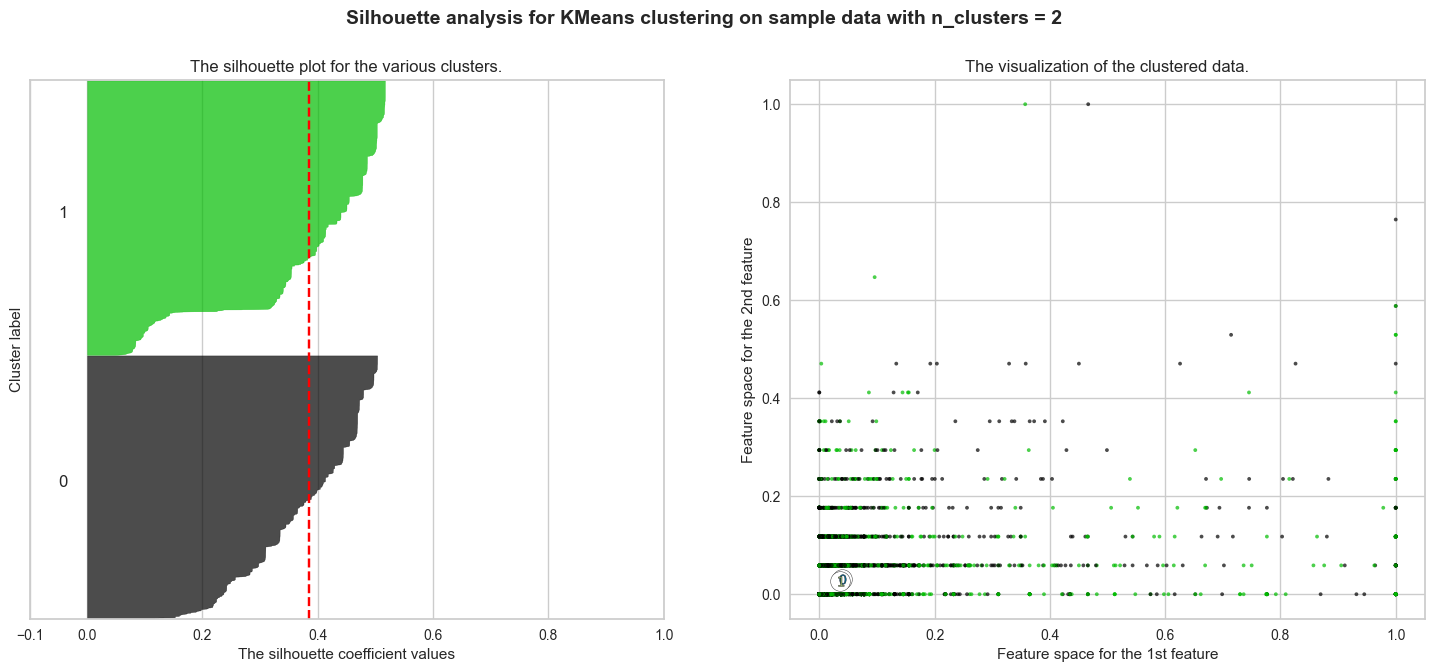

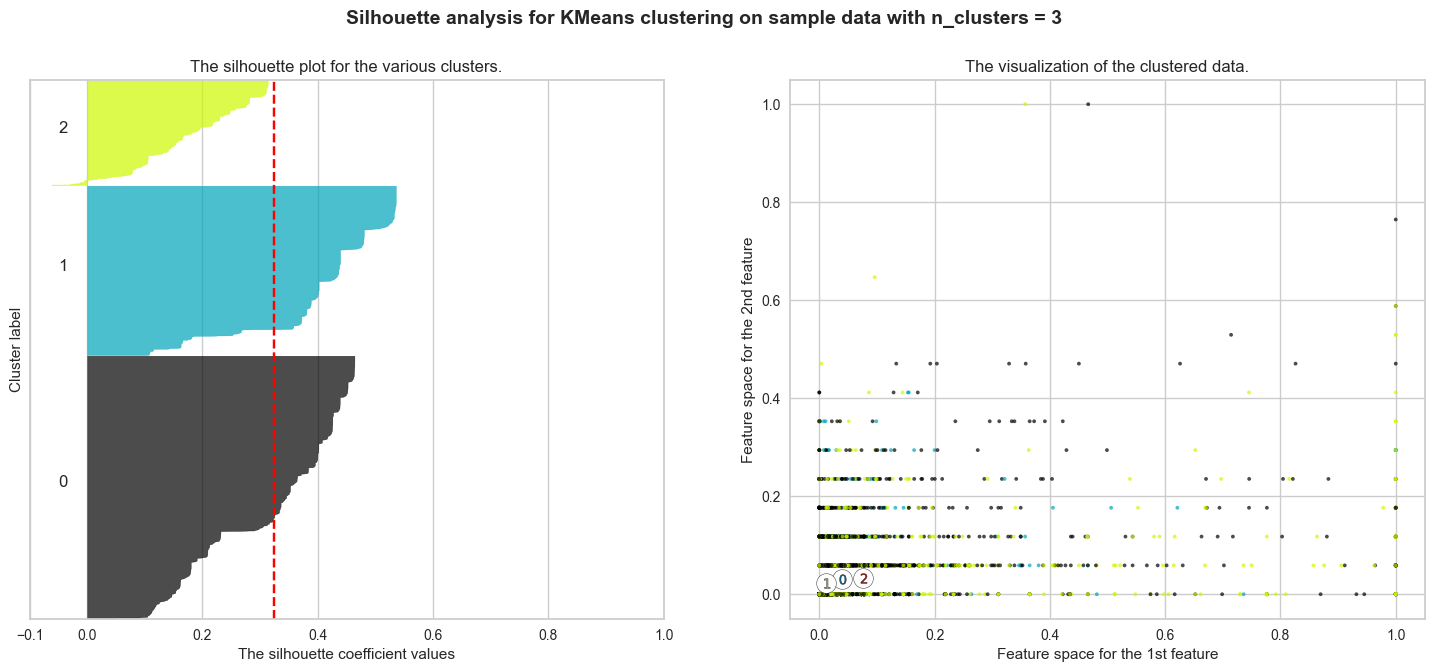

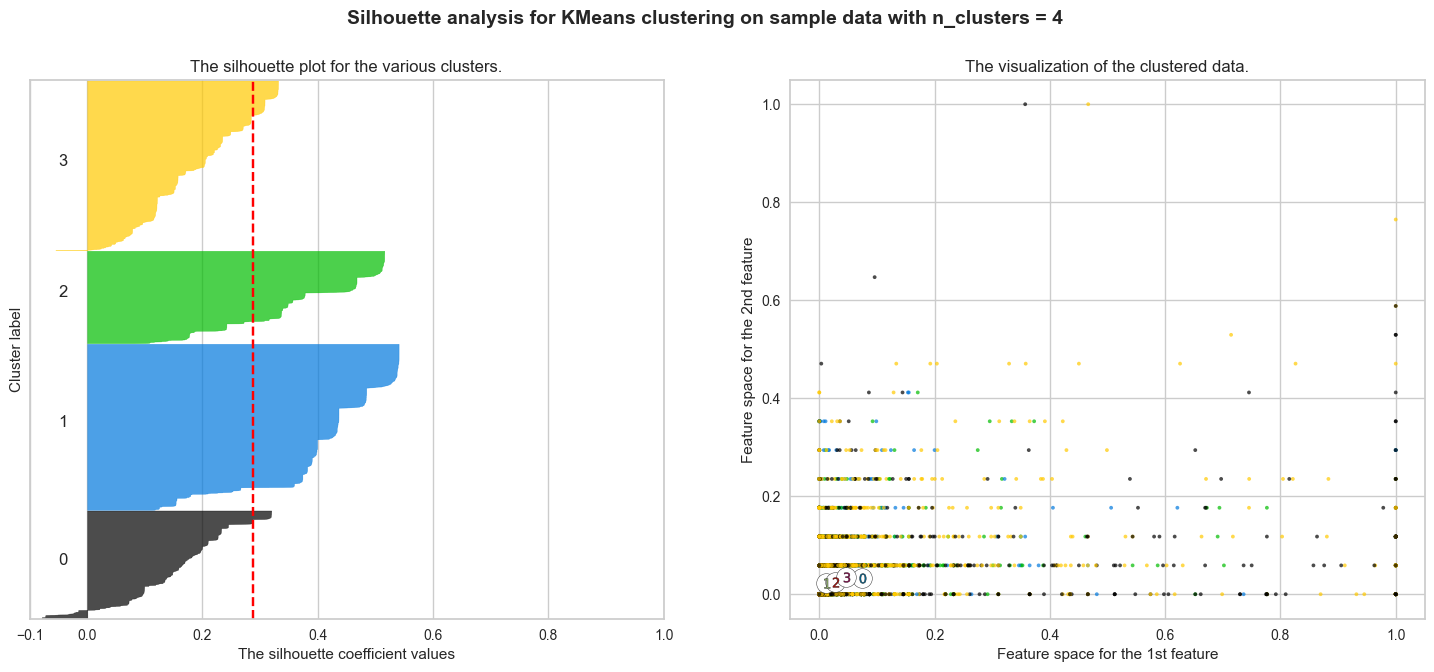

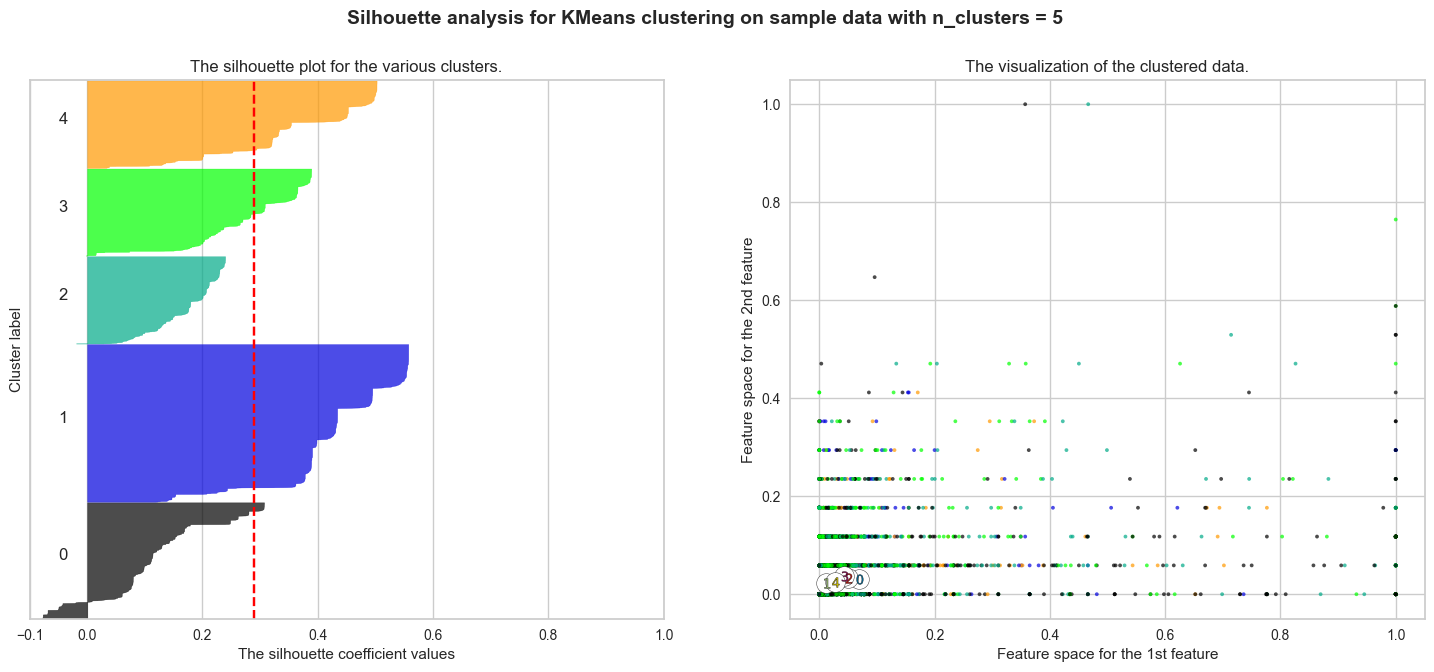

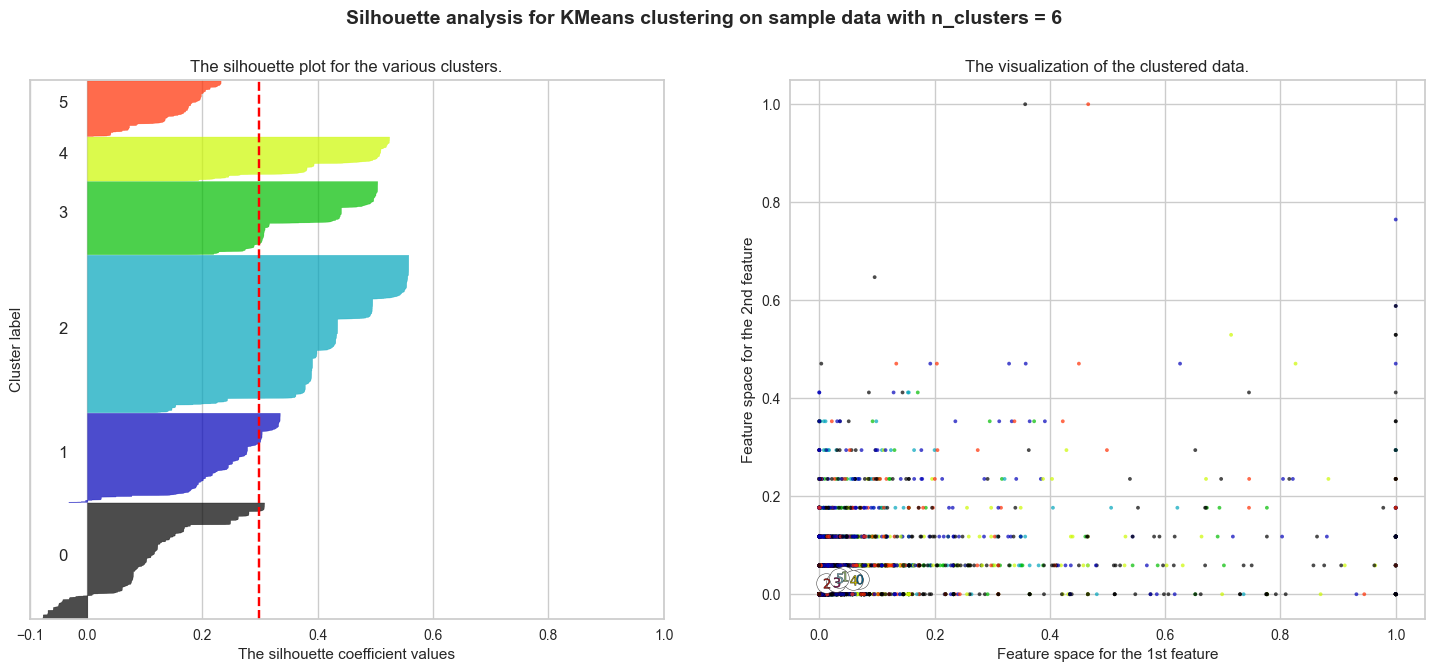

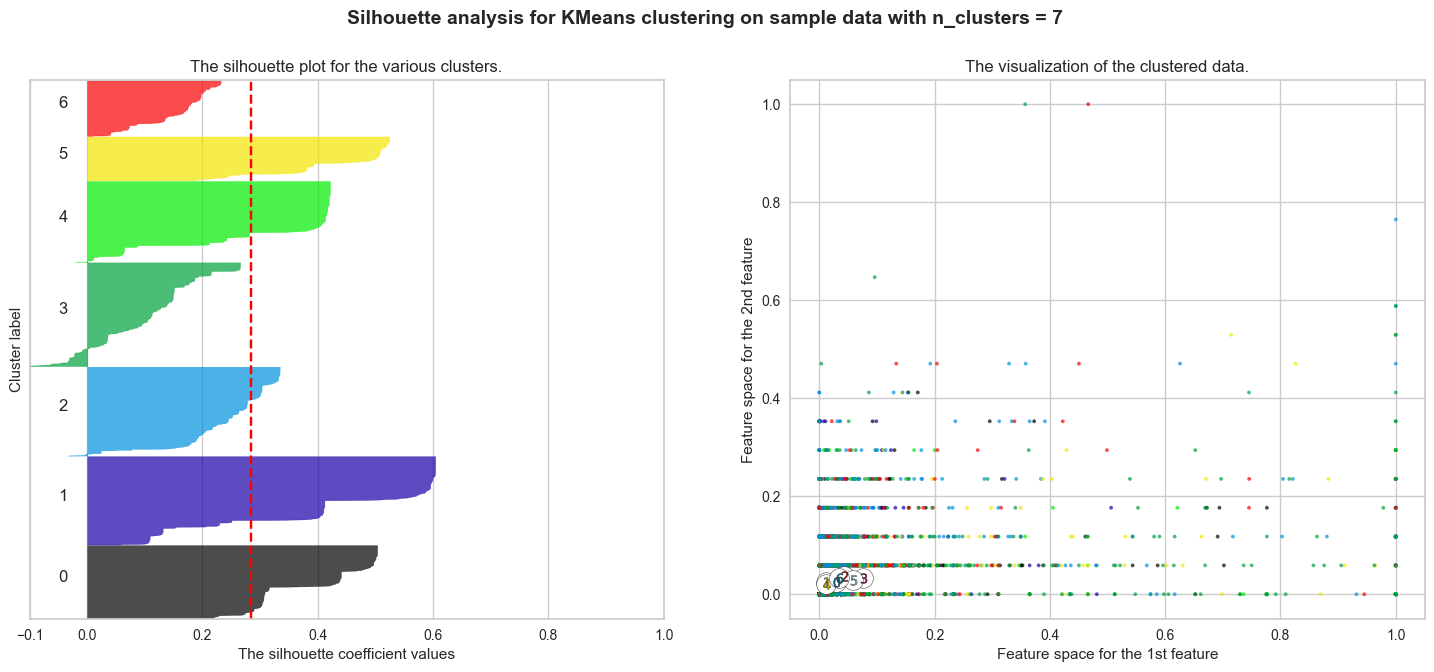

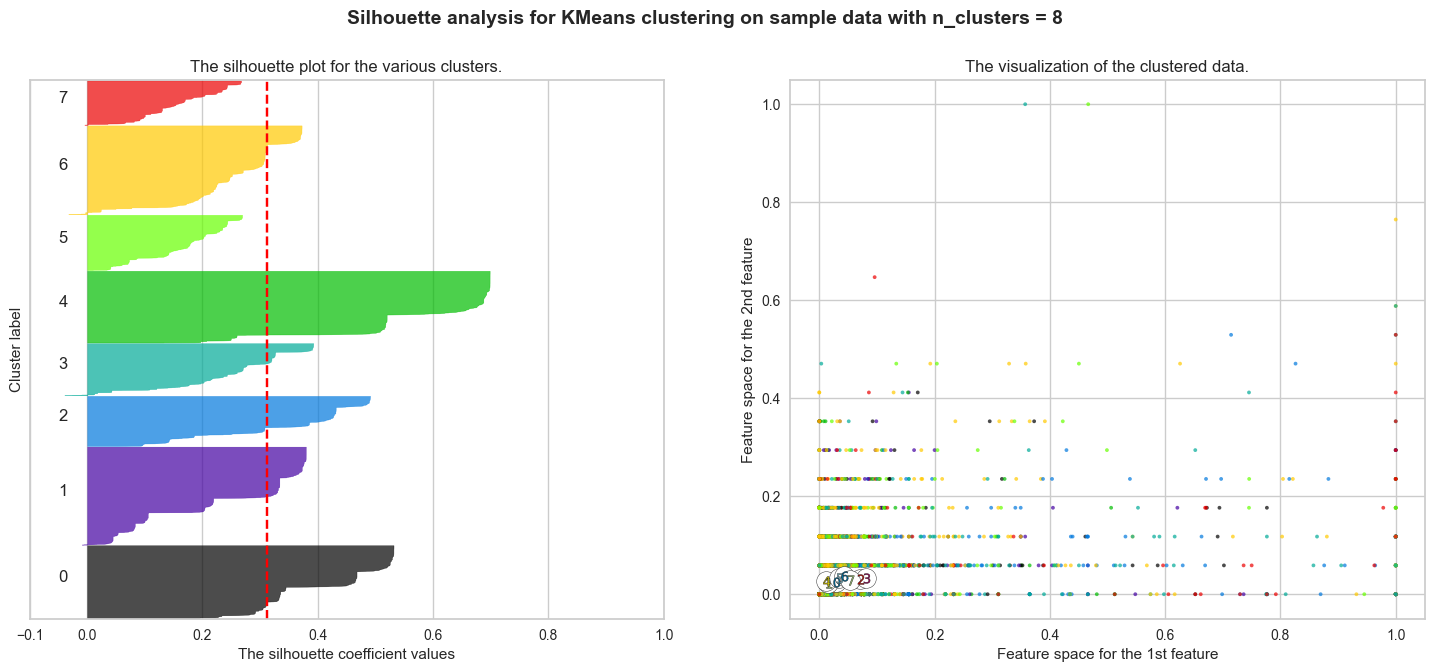

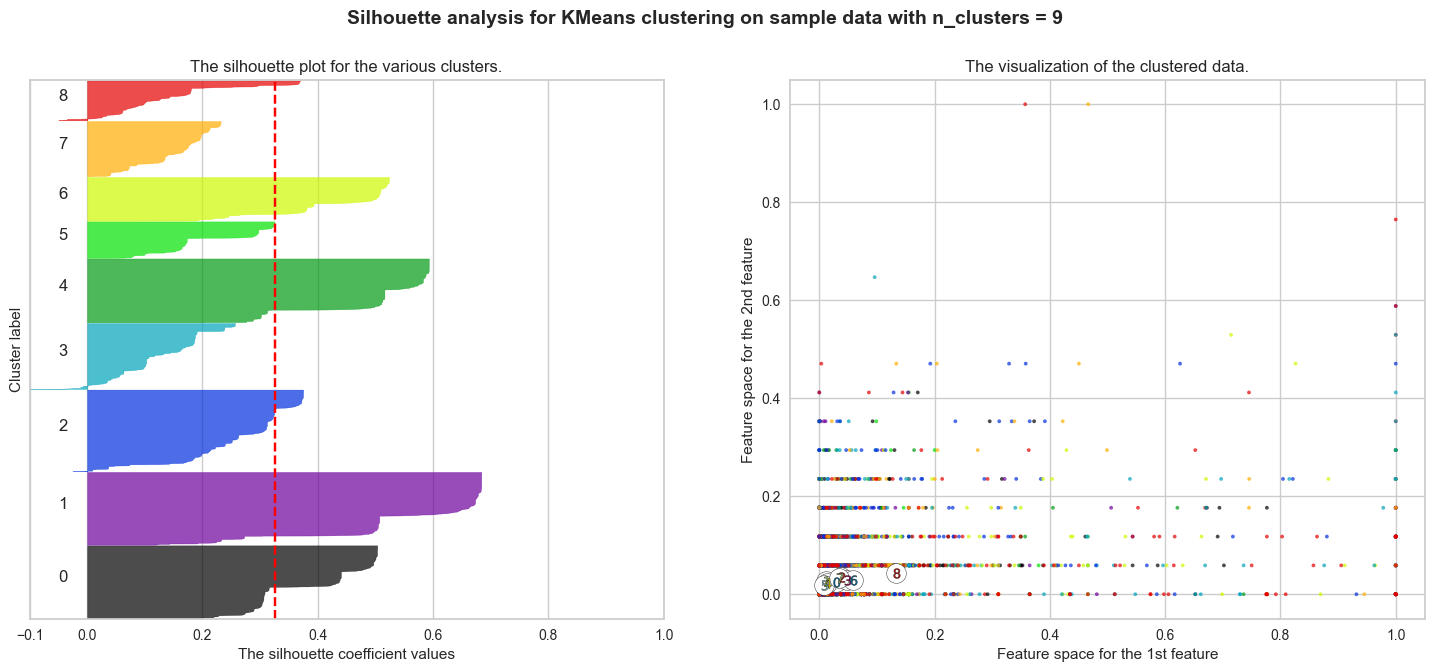

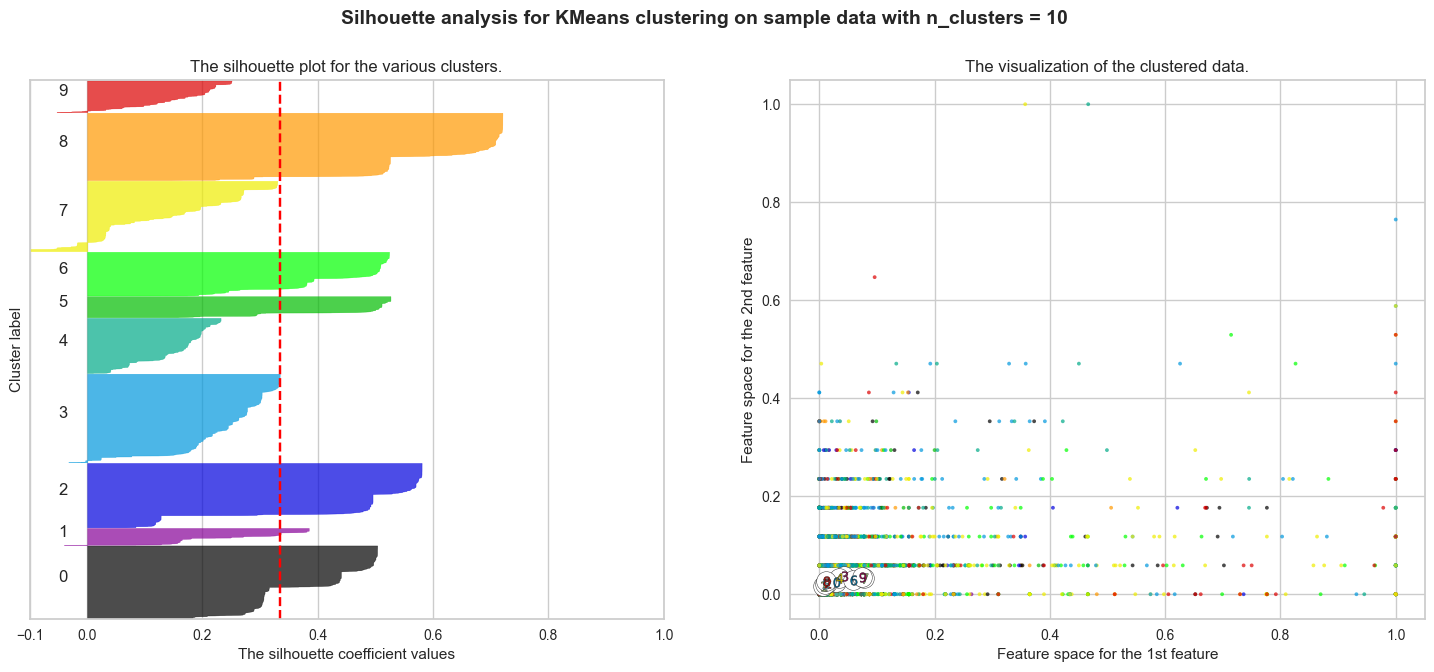

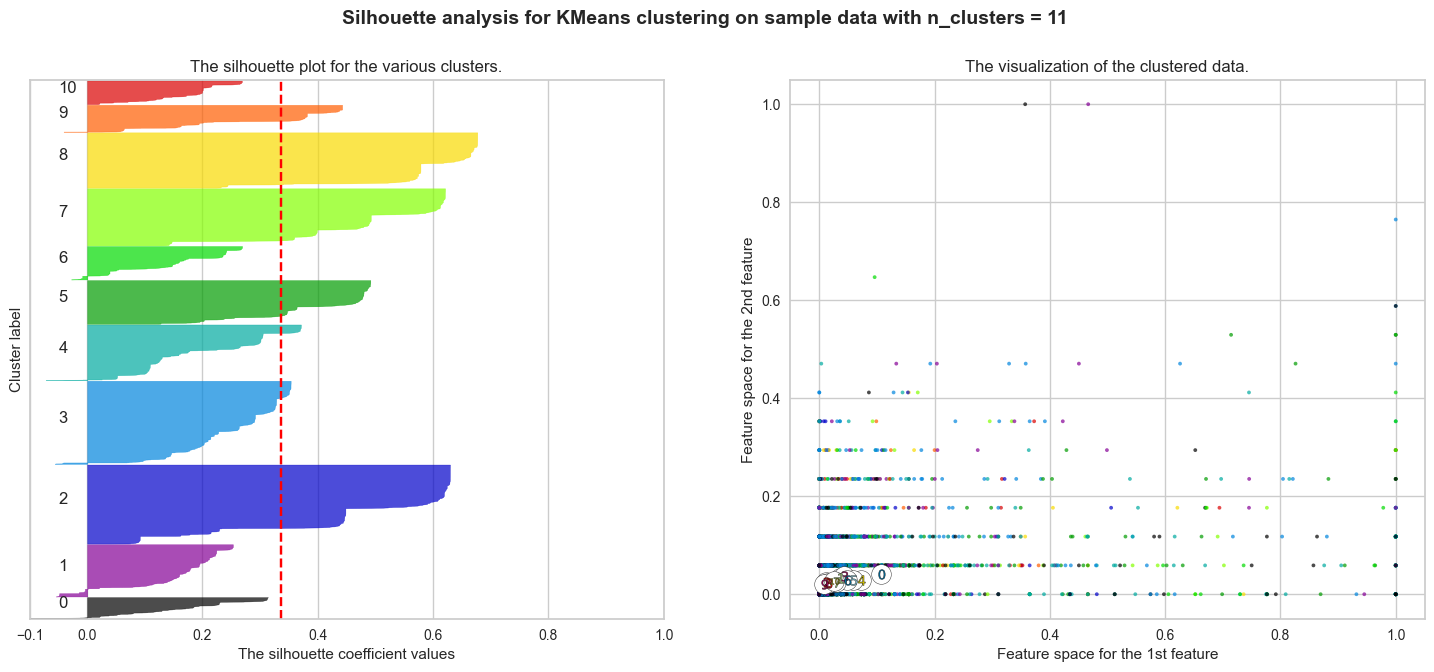

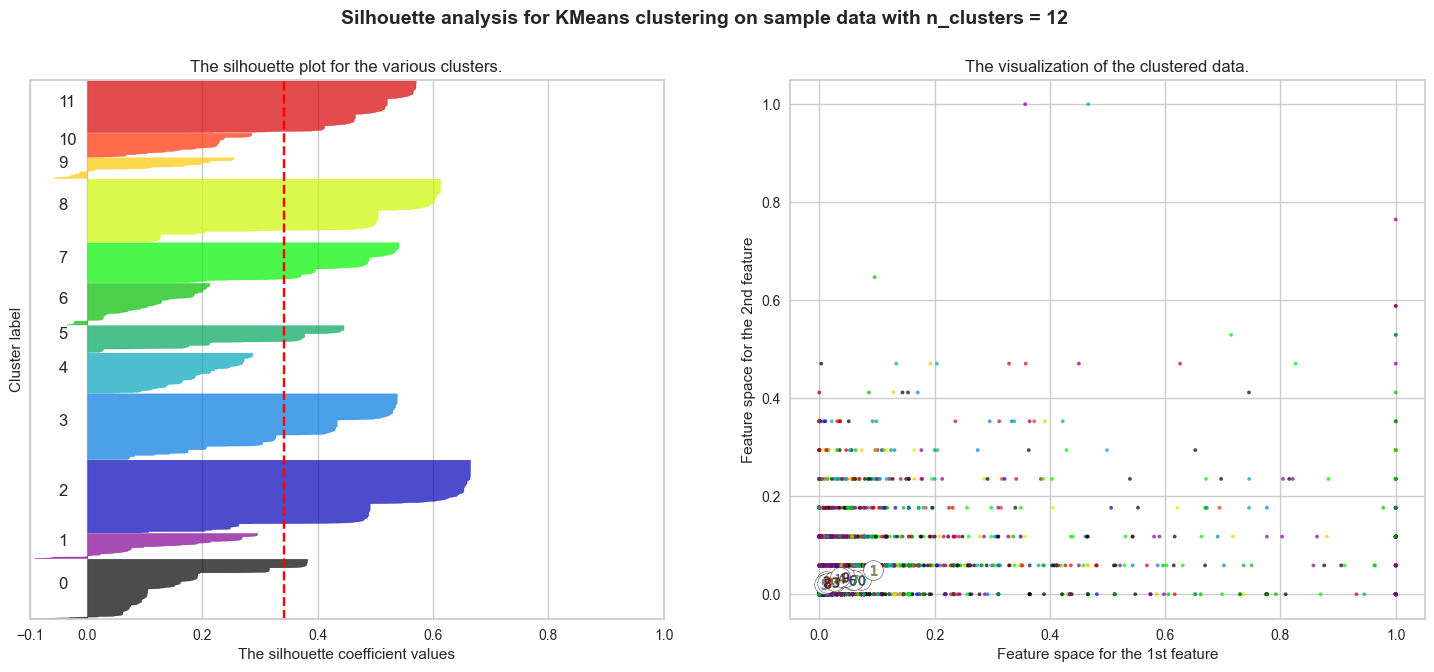

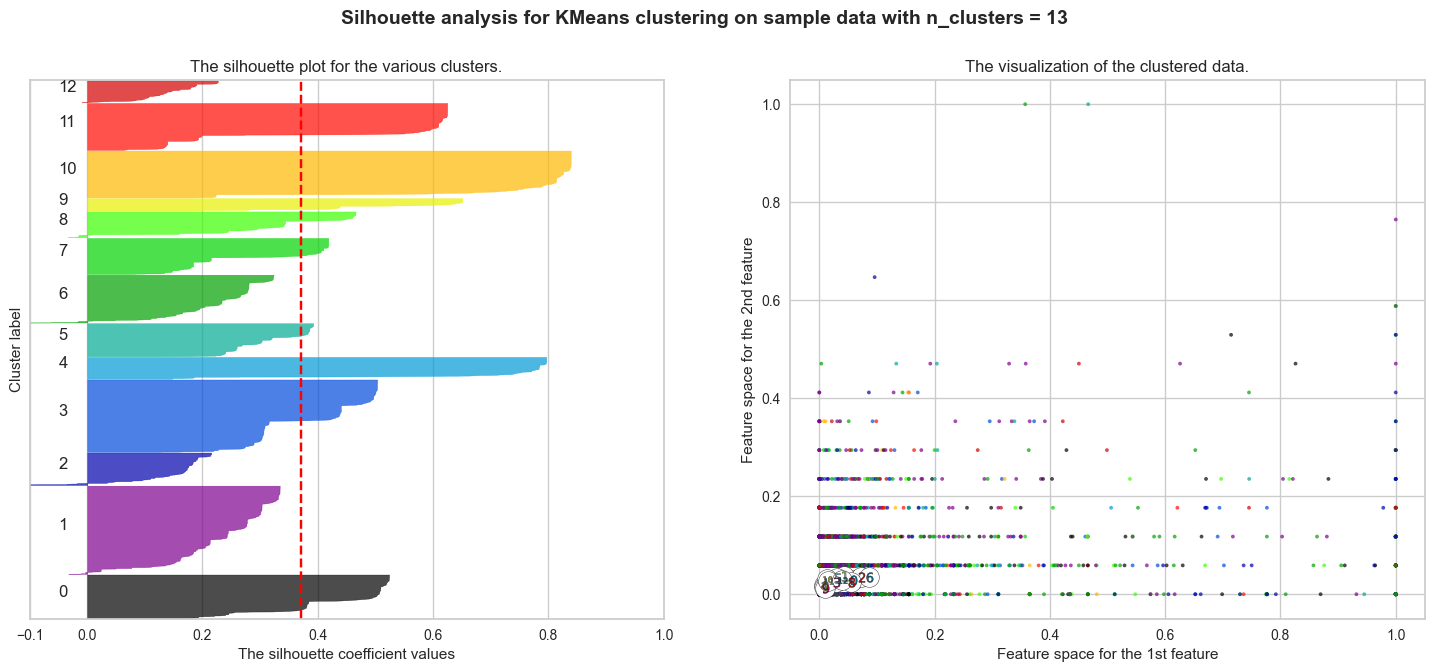

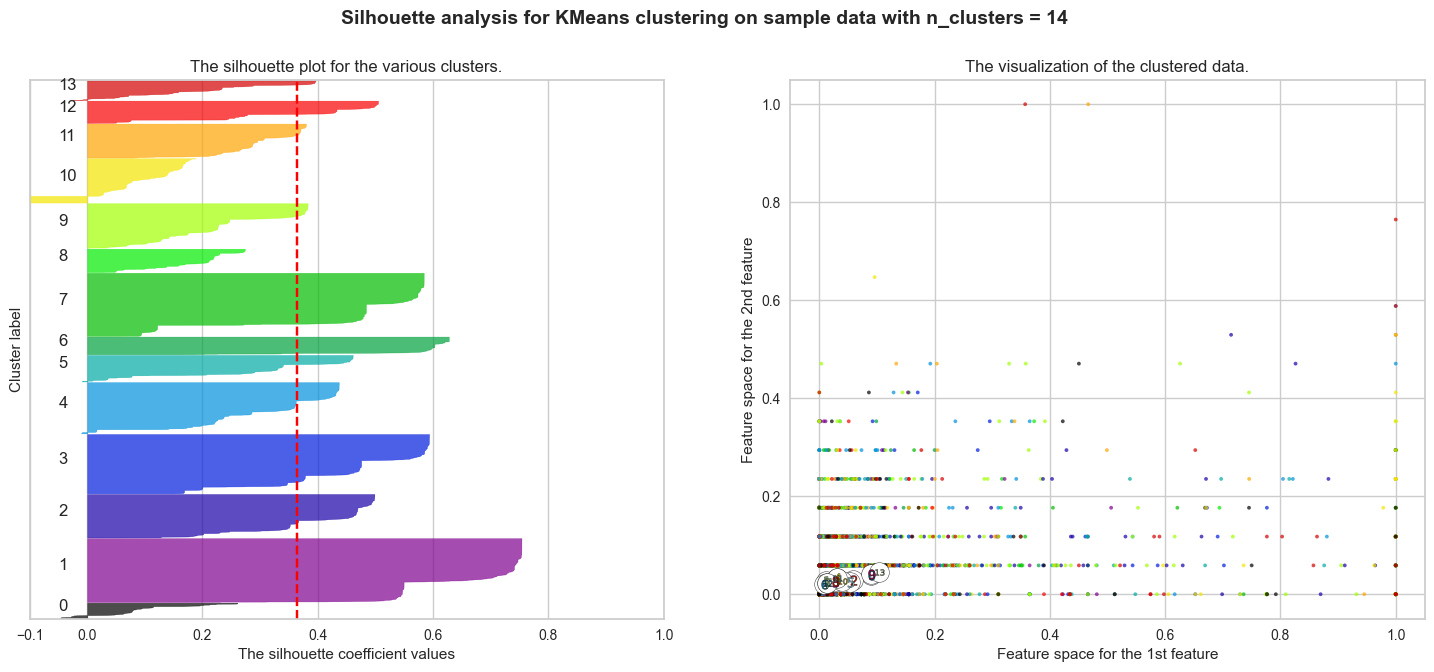

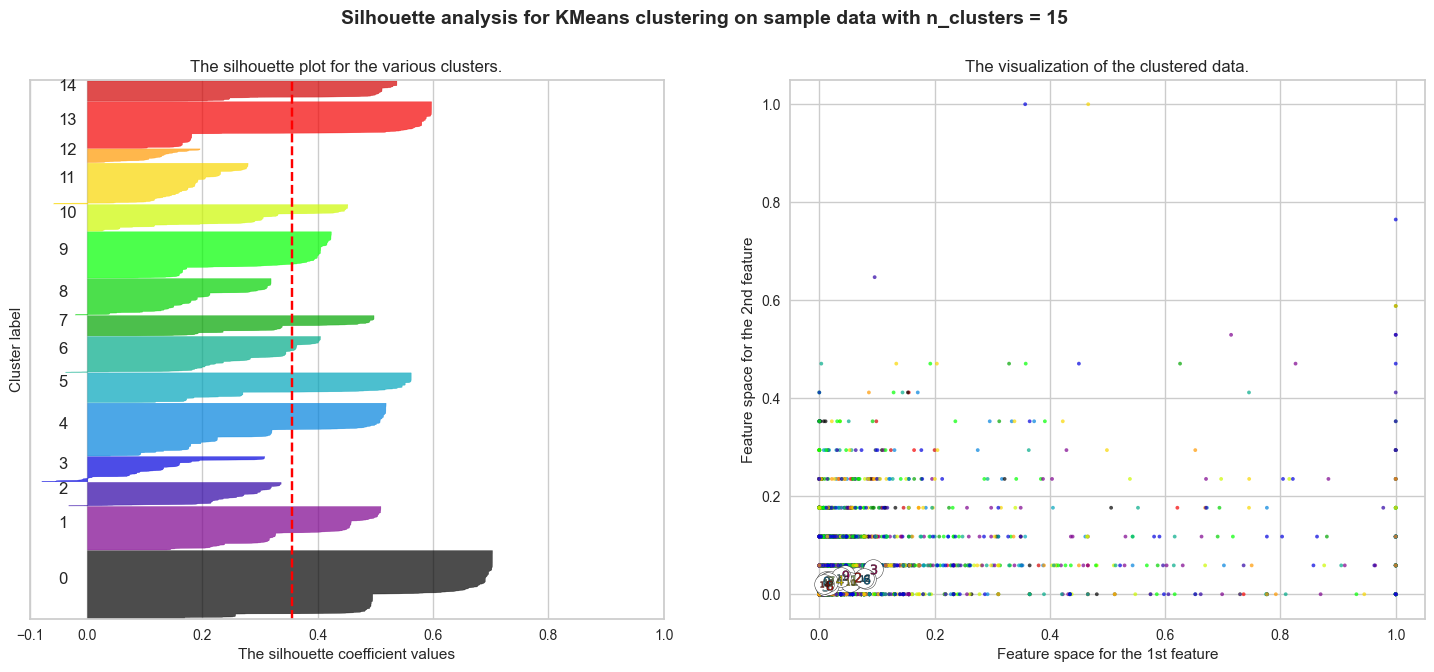

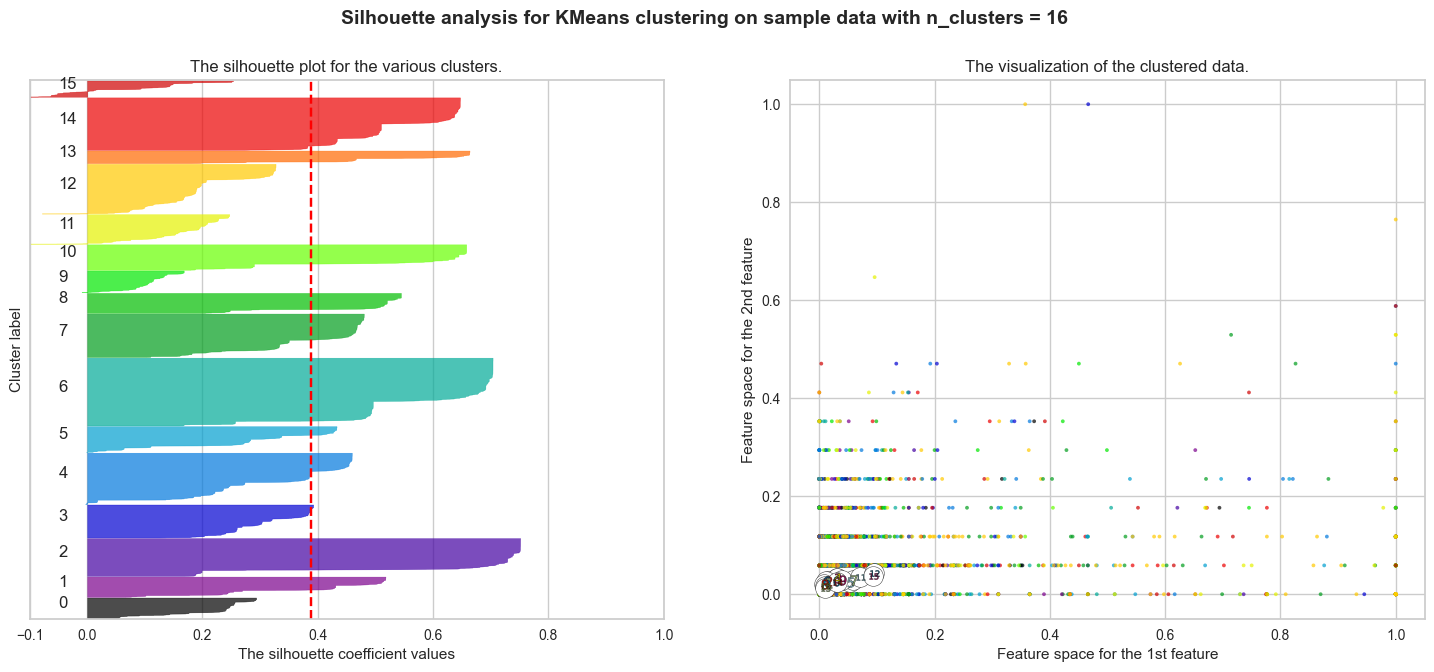

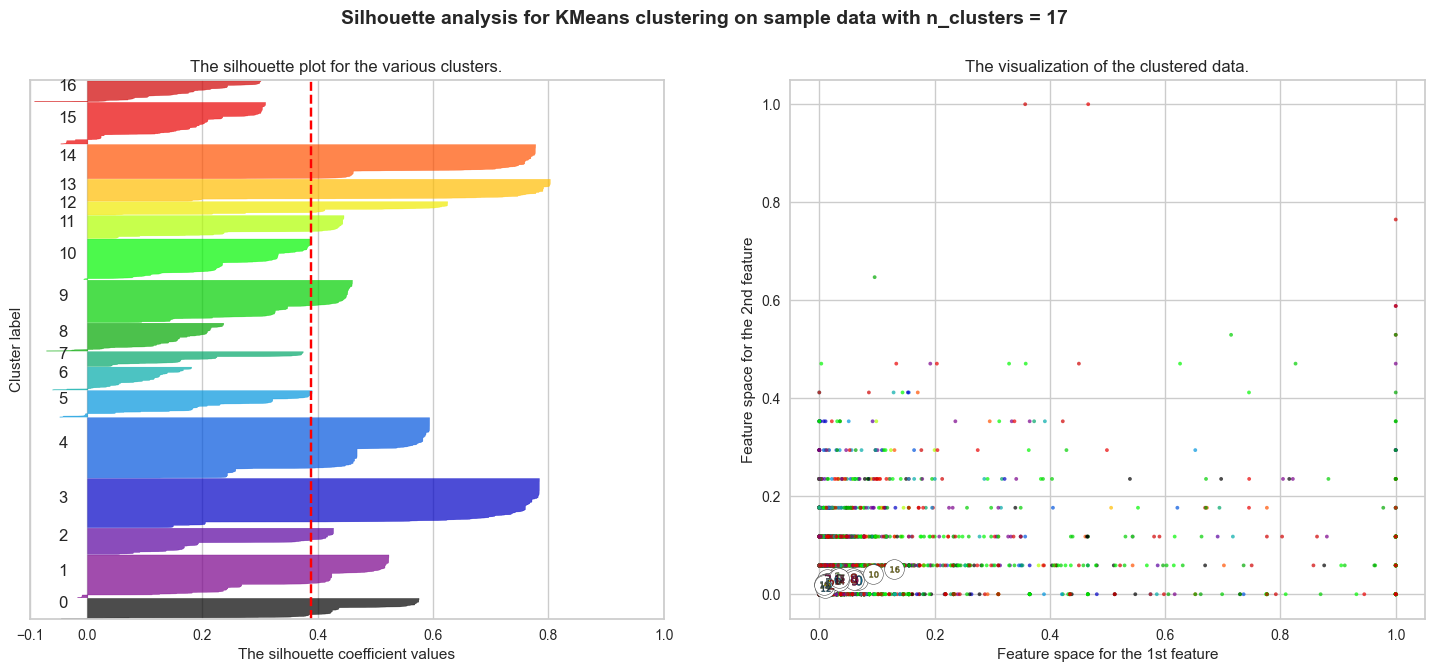

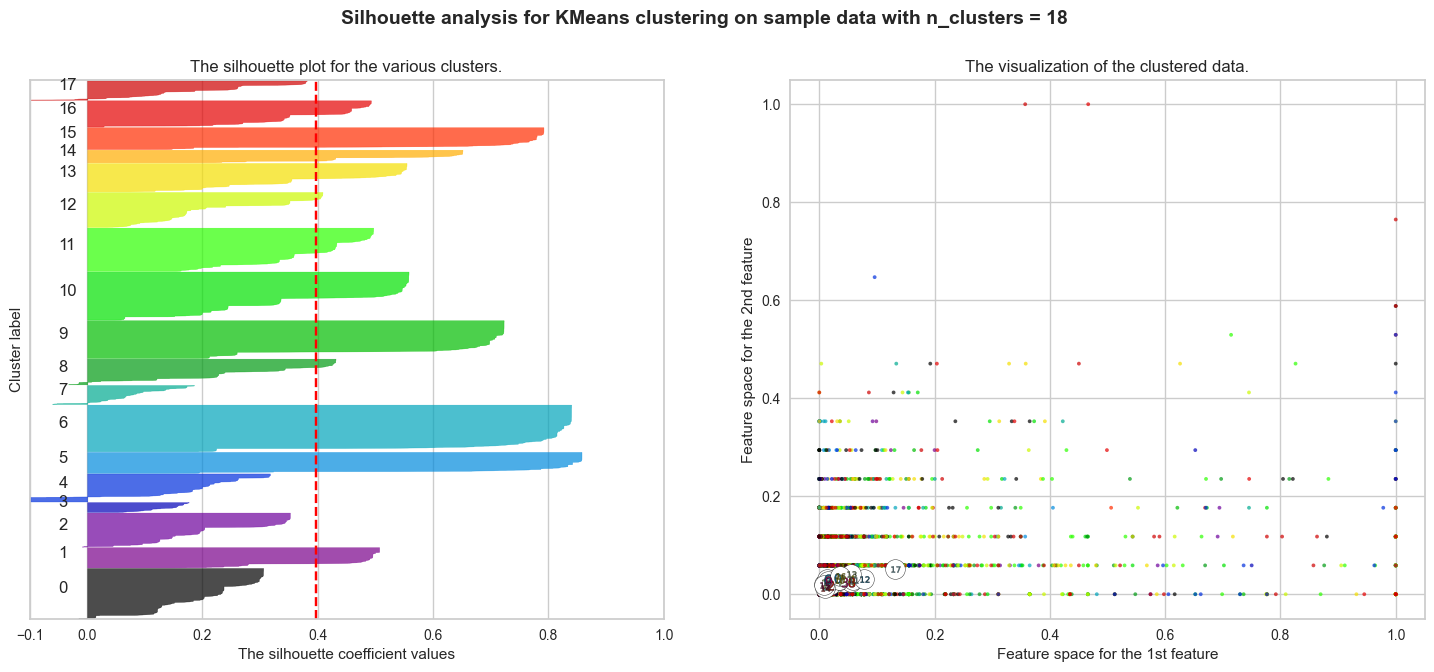

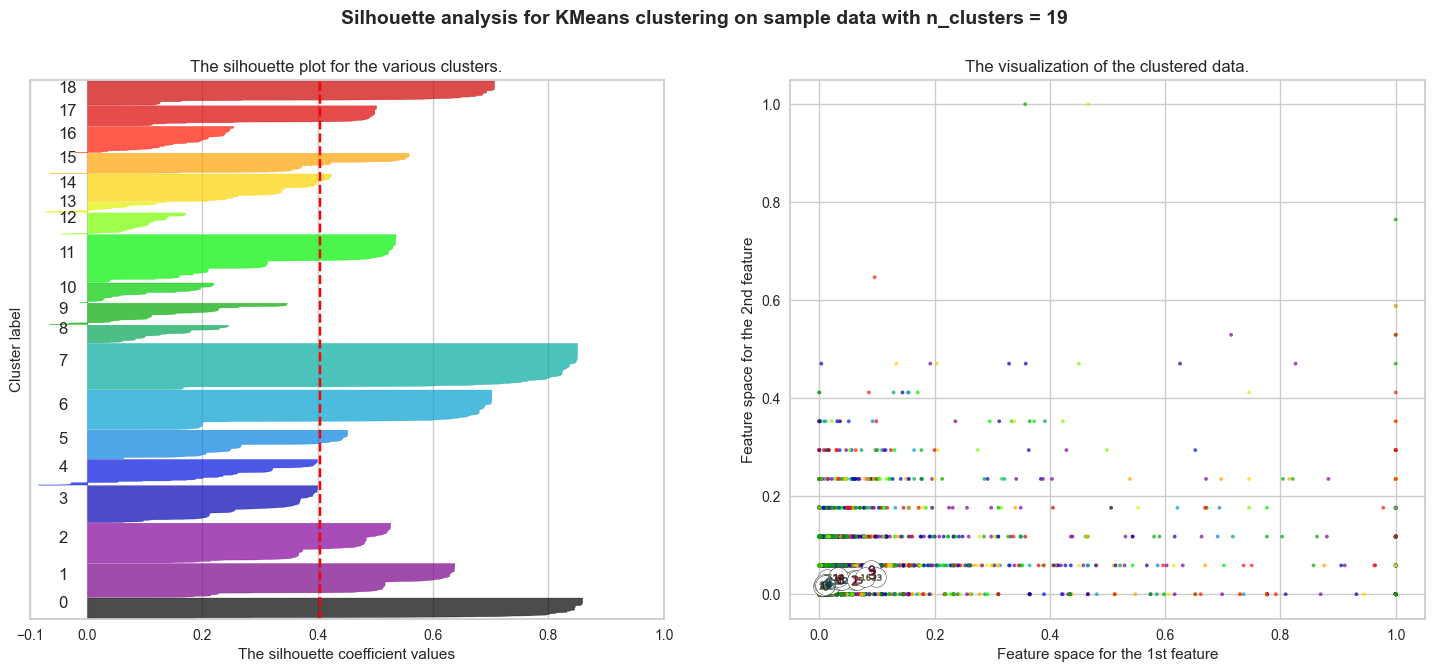

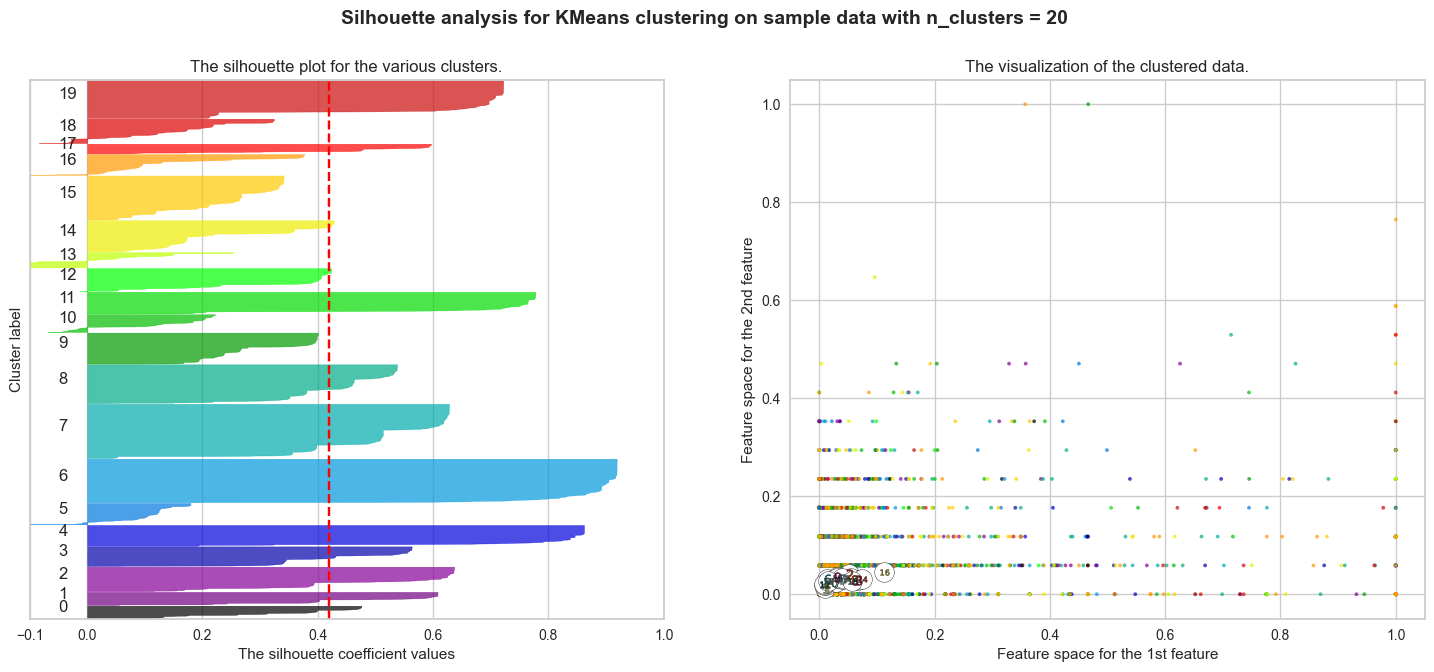

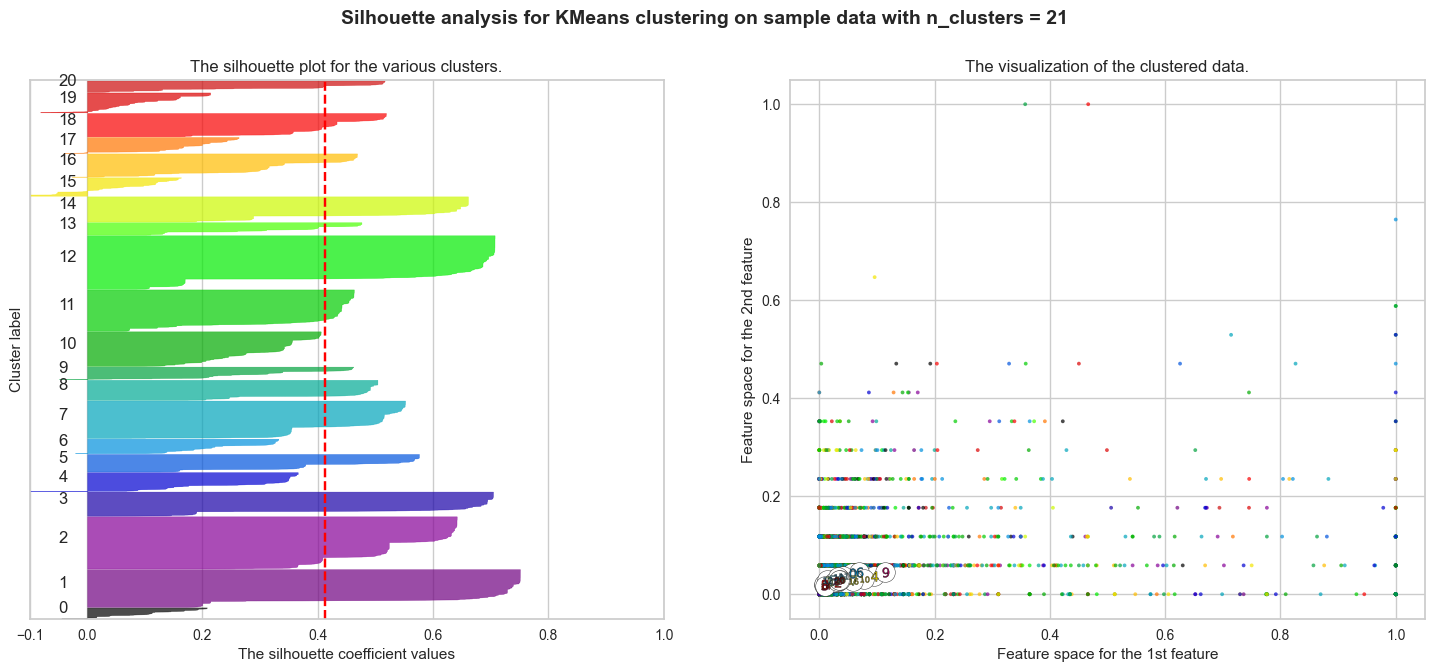

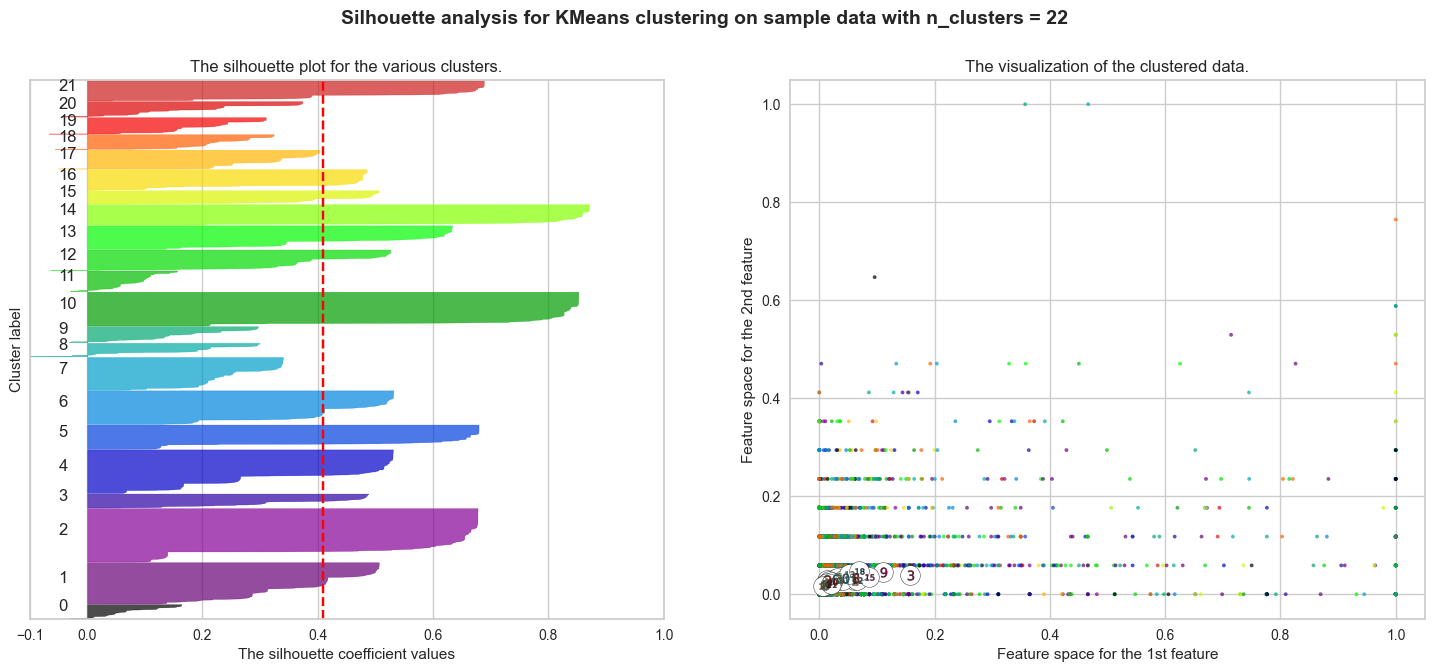

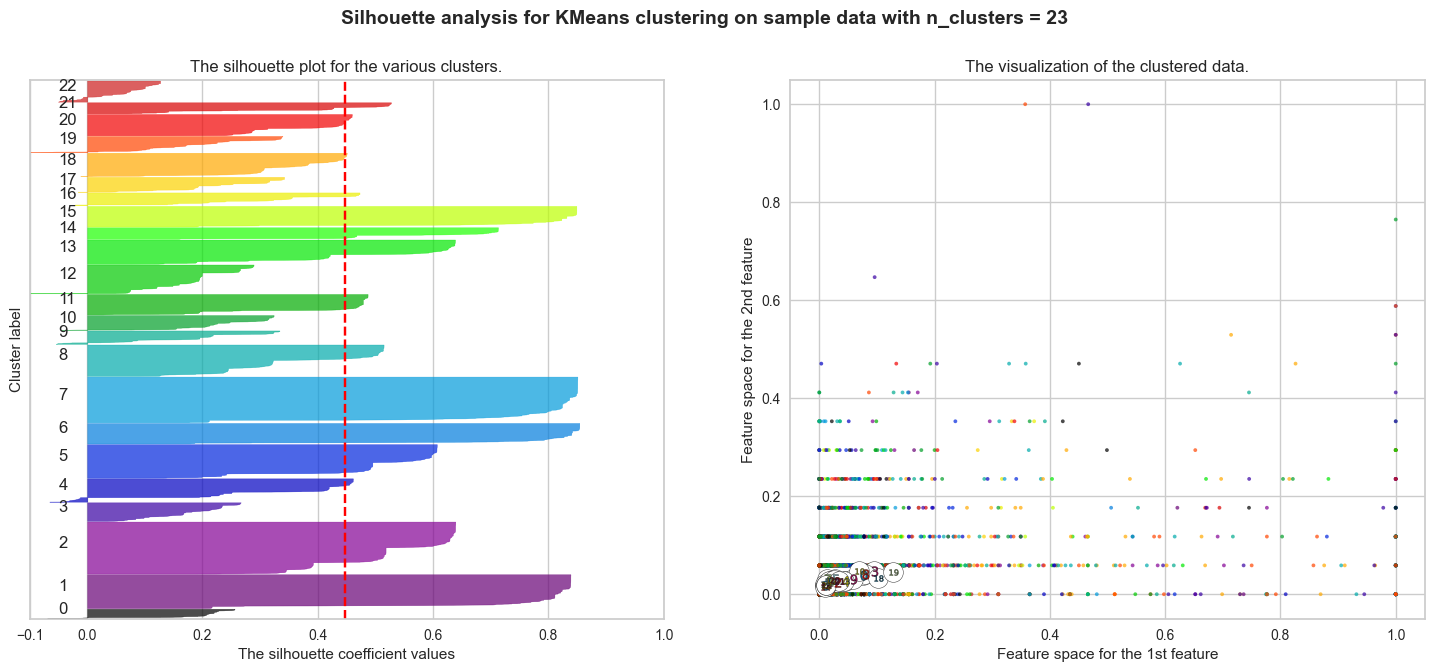

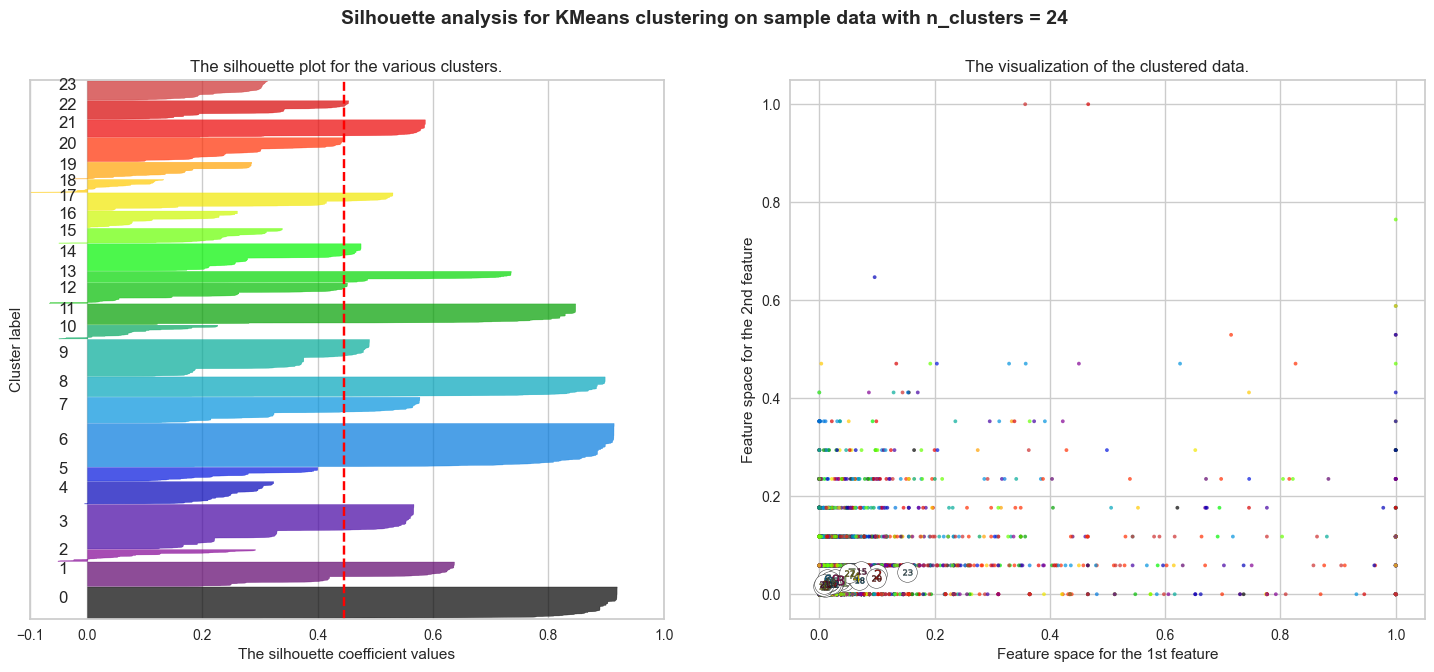

In [92]:
silhoutte_analysis(pipeline_df,list(range(2,25)))

The number of methods obtained using the shiloutte method is 23 with a score of 0.44731043289980815.

For now, because of the purpose of `learning,`  I will reduce the number of clusters and choose to use `5 clusters` for the KMeans algorithm.

##### Run The Model KMeans

changing n_cluster to 5 clusters and leaving the other parameters the same.

In [93]:
model_kmeans = KMeans(n_clusters = 5)
labels = model_kmeans.fit_predict(pipeline_df)

In [94]:
cluster_w_kmeans = df_cluster.copy()
cluster_w_kmeans['label'] = labels
cluster_w_kmeans['label'].unique()

array([0, 2, 3, 4, 1])

##### Analyze Cluster

In [95]:
categorical_col = ['user_occupation','user_generation','user_income_source','user_income_range','referral_code_used']
invested_col = ['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']
frequency_col = ['Saham_Transaction_Freq','Pasar_Uang_Transaction_Freq','Pendapatan_Tetap_Transaction_Freq','Campuran_Transaction_Freq']

In [96]:
df_cluster_0 = cluster_w_kmeans[cluster_w_kmeans['label'] == 0]

for i in categorical_col:
  x = pd.DataFrame(df_cluster_0[i].value_counts(normalize=True).reset_index())
  x = x.rename(columns={x.columns[0] : x.columns[1], x.columns[1] : 'value'})
  print(x, '\n')


freq = []
for i in frequency_col:
  freq.append(df_cluster_0[i].agg(['min', 'mean','max']))
freq_clust_0 = pd.DataFrame(freq).T


inv = []
for i in invested_col:
  inv.append(df_cluster_0[i].agg(['mean']))
inv_clust_0 = pd.DataFrame(inv).T

  user_occupation  value
0          Others   1.00 

  user_generation  value
0           Gen-Y   0.60
1           Gen-Z   0.22
2           Gen-X   0.15
3    Baby Boomers   0.02 

  user_income_source  value
0               Gaji   0.65
1             Profit   0.18
2        From Family   0.12
3            Lainnya   0.05 

         user_income_range  value
0     Rp 10 Juta - 50 Juta   0.67
1  > Rp 50 Juta - 100 Juta   0.33 

  referral_code_used  value
0                 No   0.52
1                Yes   0.48 



In [97]:
freq_clust_0

,Saham_Transaction_Freq,Pasar_Uang_Transaction_Freq,Pendapatan_Tetap_Transaction_Freq,Campuran_Transaction_Freq
min,0.00,0.00,0.00,0.00
mean,0.55,0.63,0.55,0.02
max,17.00,16.00,14.00,5.00


In [98]:
inv_clust_0

,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,332769.73,1550459.12,1154102.58,141676.37


Cluster 0:

- 49% are private.
- 85% are Gen-Y
- 75% Income comes from Salary
- 60% income Rp 10 million - 50 million
- 67% do not use referral code
- Interested in all types of mutual funds, but most interested in Fixed Income and Money Market
- Average transaction more than 10
- A very good user who invests a lot of money (high)

In [99]:
df_cluster_1 = cluster_w_kmeans[cluster_w_kmeans['label'] == 1]

for i in categorical_col:
  x = pd.DataFrame(df_cluster_1[i].value_counts(normalize=True).reset_index())
  x = x.rename(columns={x.columns[0] : x.columns[1], x.columns[1] : 'value'})
  print(x, '\n')


freq = []
for i in frequency_col:
  freq.append(df_cluster_1[i].agg(['min', 'mean','max']))
freq_clust_1 = pd.DataFrame(freq).T


inv = []
for i in invested_col:
  inv.append(df_cluster_1[i].agg(['mean']))
inv_clust_1 = pd.DataFrame(inv).T

  user_occupation  value
0         Pelajar   0.88
1          Others   0.10
2          Swasta   0.02 

  user_generation  value
0           Gen-Z   0.98
1           Gen-Y   0.02 

  user_income_source  value
0            Lainnya   0.43
1               Gaji   0.38
2             Profit   0.12
3        From Family   0.08 

  user_income_range  value
0         < 10 Juta   0.99
1     > Rp 100 Juta   0.01 

  referral_code_used  value
0                 No   0.63
1                Yes   0.37 



In [100]:
freq_clust_1

,Saham_Transaction_Freq,Pasar_Uang_Transaction_Freq,Pendapatan_Tetap_Transaction_Freq,Campuran_Transaction_Freq
min,0.00,0.00,0.00,0.00
mean,0.40,0.55,0.42,0.00
max,7.00,10.00,8.00,3.00


In [101]:
inv_clust_1

,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,81682.82,143393.97,123183.15,32622.42


Cluster 1:

- 95% Students
- 96% Gen-X
- 81% Income comes from other
- 99% income < 10 million
- 75% do not use referral code
- Invest more in Money Market
- average transaction below 10
- Type of user who does not invest too much (low)

In [102]:
df_cluster_2 = cluster_w_kmeans[cluster_w_kmeans['label'] == 2]

for i in categorical_col:
  x = pd.DataFrame(df_cluster_2[i].value_counts(normalize=True).reset_index())
  x = x.rename(columns={x.columns[0] : x.columns[1], x.columns[1] : 'value'})
  print(x, '\n')


freq = []
for i in frequency_col:
  freq.append(df_cluster_2[i].agg(['min', 'mean','max']))
freq_clust_2 = pd.DataFrame(freq).T


inv = []
for i in invested_col:
  inv.append(df_cluster_2[i].agg(['mean']))
inv_clust_2 = pd.DataFrame(inv).T

  user_occupation  value
0          Swasta   0.46
1          Others   0.31
2         Pelajar   0.23 

  user_generation  value
0           Gen-Y   0.78
1           Gen-X   0.19
2    Baby Boomers   0.02
3           Gen-Z   0.01 

  user_income_source  value
0               Gaji   0.70
1             Profit   0.14
2        From Family   0.09
3            Lainnya   0.07 

  user_income_range  value
0         < 10 Juta   0.58
1     > Rp 100 Juta   0.42 

  referral_code_used  value
0                 No   0.66
1                Yes   0.34 



In [103]:
freq_clust_2

,Saham_Transaction_Freq,Pasar_Uang_Transaction_Freq,Pendapatan_Tetap_Transaction_Freq,Campuran_Transaction_Freq
min,0.00,0.00,0.00,0.00
mean,0.56,0.63,0.63,0.03
max,17.00,10.00,13.00,6.00


In [104]:
inv_clust_2

,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,727192.26,1746843.58,3405354.63,587802.47


Cluster 2:

- 80% Student
- 100% Gen-X
- 79% Income comes from Salary
- 98% income < 10 million
- 50:50, 50% of users use referral code
- Users who invest a lot in Money Market
- average transaction below 10
- Type of user who does not invest too much (low)


In [105]:
df_cluster_3 = cluster_w_kmeans[cluster_w_kmeans['label'] == 3]

for i in categorical_col:
  x = pd.DataFrame(df_cluster_3[i].value_counts(normalize=True).reset_index())
  x = x.rename(columns={x.columns[0] : x.columns[1], x.columns[1] : 'value'})
  print(x, '\n')


freq = []
for i in frequency_col:
  freq.append(df_cluster_3[i].agg(['min', 'mean','max']))
freq_clust_3 = pd.DataFrame(freq).T


inv = []
for i in invested_col:
  inv.append(df_cluster_3[i].agg(['mean']))
inv_clust_3 = pd.DataFrame(inv).T

  user_occupation  value
0          Swasta   0.65
1         Pelajar   0.35 

  user_generation  value
0           Gen-Y   0.87
1           Gen-X   0.12
2    Baby Boomers   0.01
3           Gen-Z   0.01 

  user_income_source  value
0               Gaji   0.79
1             Profit   0.13
2        From Family   0.04
3            Lainnya   0.04 

         user_income_range  value
0     Rp 10 Juta - 50 Juta   0.58
1  > Rp 50 Juta - 100 Juta   0.42 

  referral_code_used  value
0                 No   0.72
1                Yes   0.28 



In [106]:
freq_clust_3

,Saham_Transaction_Freq,Pasar_Uang_Transaction_Freq,Pendapatan_Tetap_Transaction_Freq,Campuran_Transaction_Freq
min,0.00,0.00,0.00,0.00
mean,0.59,0.65,0.61,0.02
max,13.00,9.00,8.00,3.00


In [107]:
inv_clust_3

,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,442379.36,814905.84,1514816.65,172109.66


Cluster 3:

- 79% Student
- 1% Gen-X
- 73% Income comes from Salary
- 80% income Rp 10 Million - 50 Million
- 60% do not use referral code
- Users who invest mostly in fixed income
- average transaction below 10, but prominent in money market
- User types who do not invest too much (medium)


In [108]:
df_cluster_4 = cluster_w_kmeans[cluster_w_kmeans['label'] == 4]

for i in categorical_col:
  x = pd.DataFrame(df_cluster_4[i].value_counts(normalize=True).reset_index())
  x = x.rename(columns={x.columns[0] : x.columns[1], x.columns[1] : 'value'})
  print(x, '\n')


freq = []
for i in frequency_col:
  freq.append(df_cluster_4[i].agg(['min', 'mean','max']))
freq_clust_4 = pd.DataFrame(freq).T


inv = []
for i in invested_col:
  inv.append(df_cluster_4[i].agg(['mean']))
inv_clust_4 = pd.DataFrame(inv).T

  user_occupation  value
0         Pelajar   0.93
1          Swasta   0.07 

  user_generation  value
0           Gen-Z   1.00 

  user_income_source  value
0               Gaji   0.73
1             Profit   0.13
2            Lainnya   0.11
3        From Family   0.03 

         user_income_range  value
0     Rp 10 Juta - 50 Juta   0.82
1  > Rp 50 Juta - 100 Juta   0.18 

  referral_code_used  value
0                 No   0.62
1                Yes   0.38 



In [109]:
freq_clust_4

,Saham_Transaction_Freq,Pasar_Uang_Transaction_Freq,Pendapatan_Tetap_Transaction_Freq,Campuran_Transaction_Freq
min,0.00,0.00,0.00,0.00
mean,0.44,0.59,0.45,0.01
max,7.00,17.00,6.00,2.00


In [110]:
inv_clust_4

,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,196913.72,288794.43,526257.56,60949.26


Cluster 4:

- 47% Student
- 79% Gen-Y
- 70% Income comes from Salary
- 59% income < 10 million
- 66% do not use referral code
- Interested in all types of mutual funds, but most interested in Fixed income and Money market
- average transaction more than 10
- Very good user and invest with large amount (high)


### 2. KPrototype

Note = KPrototype is similar to Kmeans, but Kmeans is only for numerical, while KProtoype can be for numerical and categorical.

#### Transform Dataset
The first step is to convert all string type data into categorical numbers using the pipeline.

In [111]:
prep_kpro = ColumnTransformer([
    ('categoric1', cat_pipe(encoder = 'ordinal'), ['user_occupation', 'user_income_source', 'referral_code_used', 'user_income_source', 'user_generation']),
    ('numeric', num_pipe(), ['Saham_invested_amount', 'Saham_Transaction_Freq', 'Pasar_Uang_invested_amount', 'Pasar_Uang_Transaction_Freq', 'Pendapatan_Tetap_invested_amount', 'Pendapatan_Tetap_Transaction_Freq', 'Campuran_invested_amount', 'Campuran_Transaction_Freq'])
    
])

pipe_kpro = Pipeline([
    ('outlier', windsoriser_skewness),
    ('prep', prep_kpro)
])

Modify the df_cluster dataframe by applying pipe_kpro.

In [112]:
kpro_clust = pipe_kpro.fit_transform(df_cluster)
kpro_clust = pd.DataFrame(kpro_clust, columns = df_cluster.columns)

#### Run the model

the number of clusters will follow the kmeans cluster which is 5 clusters

In [113]:
model = KPrototypes(n_clusters = 5)
label = model.fit(kpro_clust, categorical = [0,1,2,3,4])

In [114]:
df_interpretasi = kpro_clust.copy()
df_interpretasi['labels'] = label

#### Analyze Cluster

In [115]:
num, cat = model._enc_cluster_centroids
df_clus_centroid = pd.DataFrame(cat, columns = df_cluster.columns[:5])
num_clus_centroid = pd.DataFrame(num, columns = df_cluster.columns[5:])
df_clus_centroid = df_clus_centroid.join(num_clus_centroid)

In [116]:
cat

array([[2, 1, 0, 1, 2],
       [1, 1, 0, 1, 2],
       [1, 1, 0, 1, 3],
       [1, 1, 0, 1, 2],
       [2, 1, 0, 1, 2]], dtype=object)

In [117]:
df_clus_centroid['user_occupation']= df_clus_centroid['user_occupation'].replace([0,1,2], ['Others', 'Swasta', 'Pelajar'])
df_clus_centroid['user_income_range']= df_clus_centroid['user_income_range'].replace([0,1,2,3], ['> Rp 50 Juta - 100 Juta', '> Rp 100 Juta', '< 10 Juta', 'Rp 10 Juta - 50 Juta'])
df_clus_centroid['referral_code_used']= df_clus_centroid['referral_code_used'].replace([0,1], ['No', 'Yes'])
df_clus_centroid['user_income_source']= df_clus_centroid['user_income_source'].replace([0,1,2,3], ['Gaji', 'Lainnya', 'Profit', 'From Family'])
df_clus_centroid['user_generation']= df_clus_centroid['user_generation'].replace([0,1,2,3], ['Gen-X', 'Baby Boomers', 'Gen-Z', 'Gen-Y'])

**Cluster 0**:
- Occupation = Student
- Income Range = > 100 Million
- Used Code = No
- Income Source = Lainnya
- Genereation = Gen-Z

- Average amount invested and Transaction frequency:

Mutual funds | Invest Amount | Frequency
---|---|---
Saham               |      854.724,95   | 0.62
Pasar Uang          |   28.148.735,14   | 2.12
Pendapatan Tetap    |    1.919.166,67	| 0,64
Campuran            |      285.714,29   | 0.02

- This cluster trades `the most` in the `Pasar Uang`.
- This cluster can be categorized as mid investors

**Recommendations**:
- Promote inviting friends by using the referral code
- Promote the importance of expanding your portfolio

---
---

**Cluster 1**:
- Occupation = Private
- Income Range = > 100 Million
- Used Code = No
- Income Source = Lainnya
- Genereation = Gen-Y

- Average number of investments and Transaction frequency:

Mutual Fund | Invest Amount | Frequency
---|---|---
Saham               |     183.134,32    | 0.48
Pasar Uang          |     206.001,19    | 0.58
Pendapatan Tetap    |     200.129,80    | 0.49
Campuran            |      75.012,57    | 0.01

- This cluster rarely conducts transactions per month
- the amount of investment can also be said to be low
- This cluster can be categorized as low investors

**Recommendations**:
- Give promotions if you invite friends by using the referral code
- To increase the number of investments and transactions, give cashback promos or free admin fees for each transaction

---
---

**Cluster 2**:
- Occupation = Student
- Income Range = > 100 Million
- Used Code = No
- Income Source = Lainnya
- Genereation = Gen-Z

- Average amount invested and Transaction frequency:

Mutual Fund | Invest Amount | Frequency
---|---|---
Saham               |    2.142.036,57   | 0.82
Pasar Uang          |    1.317.707,70   | 0.53
Pendapatan Tetap    |   49.103.349,71   | 1.98
Campuran            |    1.350.122,05   | 0.17

- This cluster does quite a lot of transactions per month
- This cluster mostly trades in Fixed Income
- This cluster can be categorized as mid high investors

**Recommendations**:
- Give promotions if you invite friends by using the referral code
- give a little privilege such as getting cash back when making transactions other than Fixed Income type

---
---

**Cluster 3**:
- Occupation = Student
- Income Range = > 100 Million
- Used Code = No
- Income Source = Lainnya
- Genereatio = Gen-Z

- Average number of investments and Transaction frequency:

Mutual Fund | Invest Amount | Frequency
---|---|---
Saham             |     3.622.688,44    | 1.31
Pasar Uang        |    36.229.822,74    | 1.12
Pendapatan Tetap  |    49.836.898,71    | 2.00
Campuran          |     1.953.058,81    | 0.06

- This cluster conducts many transactions per month
- This cluster mostly transacts in Money Market
- This cluster can be categorized as high investors

**Recommendations**:
- Give promotion if you invite friends by using referral code
- give more privileges to this cluster, such as cash back when making transactions
- give promos on other types other than money market and fixed income so that they want to invest in other types

---
---

Cluster 4:
- Occupation = Self Employed
- Income Range = > 100 Million
- Used Code = No
- Income Source = Lainnya
- Genereatio = Gen-Z

- Average number of investments and Transaction frequency:

Mutual Fund | Invest Amount | Frequency
---|---|---
Saham             |    2.917.654,34	  | 1.39
Pasar Uang        |    3.808.381,92   | 1.23
Pendapatan Tetap  |   11.398.974,93   | 1.88
Campuran          |      480.197,48   | 0.11

- This cluster does a lot of transactions per month
- This cluster mostly trades in Fixed Income
- This cluster can be categorized as mid low investors

**Recommendations**:
- Provide promotion if you invite friends by using referral code
- Provide guidance or information to be able to better understand the potential of each type of product, in order to increase the opportunity to make more transactions

---
---

Of the several types of products that already exist, `Fixed Income` is a product that has almost the same characteristics as Government Bonds, therefore, to get customers who are willing to try new products (Government Bonds), we should try to start from customers who often trade in Fixed Income. This is because they already understand the risks and benefits of the product so it is easier to switch / try new products.


The clusters that can be given promotions for new products are `Cluster 2` and `Cluster 3` where their average investment amount is almost `50 Million` per month and their average `transaction frequency is high`. 